# Goal:Employee Attrition Prediction 

In [2]:
# What is attrition?The definition of attrition means wearing down or wasting away, or the natural decline in the number of people working in an organization. 
# An example of attrition is a cliff face eroding due to rain and wind. An example of attrition is one army wearing down another throughout the course of a war.
# Dataset Link: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# About Dataset

# Dataset set contains 34 predictor variables and 1 target variable
# Main Objective:To find out why there is high employee attrition and the most important factors causing the same.

# Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [5]:
df=pd.read_csv("employee_attrition.csv")

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Duplicate Value Check

In [7]:
# Use the keep parameter to consider only the first instance of a duplicate row to be unique
bool_series = df.duplicated(keep='first')
print('Boolean series:')
print(bool_series)
print('\n')

Boolean series:
0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool




In [8]:
# Count of duplicate values
bool_series.sum()

0

In [9]:
# No duplicate values were found

# Missing Value Check

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df.shape

(1470, 35)

# Outlier Check

In [12]:
df.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,1.000000,1.0,19.690000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,165.350000,1.000000,1.000000,1.0,96.450000,1.000000,33.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,26.000000,242.800000,1.000000,1.000000,1.0,198.900000,1.000000,38.000000,2.000000,1.000000,...,1.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
df.isnull().values.any()

False

In [15]:
data = df.drop(['Attrition'],axis=1)
target = df[['Attrition']]

In [16]:
target['Attrition'] = np.where(target['Attrition'] == 'Yes',1,0)

In [17]:
target.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [18]:
target.value_counts()

Attrition
0            1233
1             237
dtype: int64

In [19]:
# We find high class imbalance which we will handle later with SMOTE 

# Multicollinearity Check

In [20]:
data = data.drop(['EmployeeNumber'],axis=1)

In [21]:
num = data.select_dtypes(include='integer')
char = data.select_dtypes(include='object')

# Multicollinearity Check Variance Inflation Factor

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(num.values, i)
                          for i in range(len(num.columns))]

In [23]:
vif_data

,feature,VIF
0,Age,2.044890
1,DailyRate,1.018198
2,DistanceFromHome,1.015515
3,Education,1.059352
4,EmployeeCount,0.000000
5,EnvironmentSatisfaction,1.010099
6,HourlyRate,1.018318
7,JobInvolvement,1.016316
8,JobLevel,11.205067
9,JobSatisfaction,1.014511


In [24]:
# High VIF observed for Job Level and Momnthly Income

In [25]:
num=num.drop('JobLevel',axis=1)

In [26]:
num=num.drop('MonthlyIncome',axis=1)

In [27]:
num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,4,19479,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,24907,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,3,2396,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,56,3,3,23159,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,2,16632,...,4,80,1,6,3,3,2,2,2,2


In [28]:
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [29]:
def unique_levels(data):
    data = data.value_counts().count()
    return data

In [30]:
data_value_counts = pd.DataFrame(num.apply(lambda data : unique_levels(data)))

In [31]:
data_value_counts.columns = ['feature_levels']
data_value_counts

,feature_levels
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobSatisfaction,4
MonthlyRate,1427


In [32]:
cat_slice = data_value_counts.loc[data_value_counts['feature_levels']<=20]
cat_list = cat_slice.index
cat = num.loc[:,cat_list]

In [33]:
cat

,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1,2,3,4,8,11,3,1,80,0,0,1,4,0,5
1,1,1,3,2,2,1,23,4,4,80,1,3,3,7,1,7
2,2,1,4,2,3,6,15,3,2,80,0,3,3,0,0,0
3,4,1,4,3,3,1,11,3,3,80,0,3,3,7,3,0
4,1,1,1,3,2,9,12,3,4,80,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,1,3,4,4,4,17,3,3,80,1,3,3,2,0,3
1466,1,1,4,2,1,4,15,3,1,80,1,5,3,7,1,7
1467,3,1,2,4,2,1,20,4,2,80,1,0,3,2,0,3
1468,3,1,4,2,2,2,14,3,4,80,0,3,2,6,0,8


In [34]:
num

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,4,19479,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,24907,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,3,2396,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,56,3,3,23159,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,2,16632,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,3,41,4,4,12290,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,4,42,2,1,21457,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2,87,4,2,5174,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,4,63,2,2,13243,...,4,80,0,17,3,2,9,6,0,8


In [35]:
num_slice = data_value_counts.loc[data_value_counts['feature_levels']>20]
num_list = num_slice.index
num = num.loc[:,num_list]

In [36]:
num

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,94,19479,8,6
1,49,279,8,61,24907,10,10
2,37,1373,2,92,2396,7,0
3,33,1392,3,56,23159,8,8
4,27,591,2,40,16632,6,2
...,...,...,...,...,...,...,...
1465,36,884,23,41,12290,17,5
1466,39,613,6,42,21457,9,7
1467,27,155,4,87,5174,6,6
1468,49,1023,2,63,13243,17,9


In [37]:
char

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [38]:
char = pd.concat([char,cat],axis=1,join="inner")

In [39]:
char

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EmployeeCount,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,1,...,11,3,1,80,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,1,...,23,4,4,80,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,1,...,15,3,2,80,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,1,...,11,3,3,80,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,...,12,3,4,80,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,2,1,...,17,3,3,80,1,3,3,2,0,3
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No,1,1,...,15,3,1,80,1,5,3,7,1,7
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes,3,1,...,20,4,2,80,1,0,3,2,0,3
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No,3,1,...,14,3,4,80,0,3,2,6,0,8


In [40]:
num

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,94,19479,8,6
1,49,279,8,61,24907,10,10
2,37,1373,2,92,2396,7,0
3,33,1392,3,56,23159,8,8
4,27,591,2,40,16632,6,2
...,...,...,...,...,...,...,...
1465,36,884,23,41,12290,17,5
1466,39,613,6,42,21457,9,7
1467,27,155,4,87,5174,6,6
1468,49,1023,2,63,13243,17,9


In [41]:
from sklearn.feature_selection import VarianceThreshold

varselector = VarianceThreshold(threshold=0) #Less than 5 and more than 35 can remove
varselector.fit_transform(num)
num_cols = varselector.get_support(indices=True)
num_cols

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [42]:
num_cols

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [43]:
char

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EmployeeCount,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,1,...,11,3,1,80,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,1,...,23,4,4,80,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,1,...,15,3,2,80,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,1,...,11,3,3,80,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,...,12,3,4,80,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,2,1,...,17,3,3,80,1,3,3,2,0,3
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No,1,1,...,15,3,1,80,1,5,3,7,1,7
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes,3,1,...,20,4,2,80,1,0,3,2,0,3
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No,3,1,...,14,3,4,80,0,3,2,6,0,8


In [44]:
char.describe()

,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.912925,1.0,2.721769,2.729932,2.728571,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,2.799320,2.761224,4.229252,2.187755,4.123129
std,1.024165,0.0,1.093082,0.711561,1.102846,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,1.289271,0.706476,3.623137,3.222430,3.568136
min,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.0,2.000000,2.000000,2.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,3.000000,1.0,3.000000,3.000000,3.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,4.000000,1.0,4.000000,3.000000,4.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,3.000000,3.000000,7.000000,3.000000,7.000000
max,5.000000,1.0,4.000000,4.000000,4.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,6.000000,4.000000,18.000000,15.000000,17.000000


In [45]:
# # Inspecting char
# char.apply(pd.value_counts)

In [46]:
# We notice EmployeeCount and StandardHours have 0 variance so no predictive power.We drop them

In [47]:
char = char.drop(['EmployeeCount','StandardHours'],axis=1)

In [48]:
num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,94,19479,8,6
1,49,279,8,61,24907,10,10
2,37,1373,2,92,2396,7,0
3,33,1392,3,56,23159,8,8
4,27,591,2,40,16632,6,2


In [49]:
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EnvironmentSatisfaction,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,2,...,8,11,3,1,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,3,...,1,23,4,4,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,4,...,6,15,3,2,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,4,...,1,11,3,3,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,...,9,12,3,4,1,3,3,2,2,2


# Outlier Removal

In [50]:
def outlier_cap(data):
  data=data.clip(lower=data.quantile(0.01))
  data=data.clip(upper=data.quantile(0.99))
  return data

In [51]:
num = num.apply(lambda data : outlier_cap(data))

In [52]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.918810,802.482993,9.192517,65.891156,14312.602483,11.268707,6.980272
std,9.099146,403.260237,8.106864,20.329428,7112.052810,7.710507,6.004901
min,19.000000,117.000000,1.000000,30.000000,2325.070000,1.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,2325.711700,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,20461.500000,15.000000,9.000000


# Exploratory Data Analysis

In [53]:
data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [54]:
data_combined = pd.concat([data,target],axis=1,join='inner')

<AxesSubplot:>

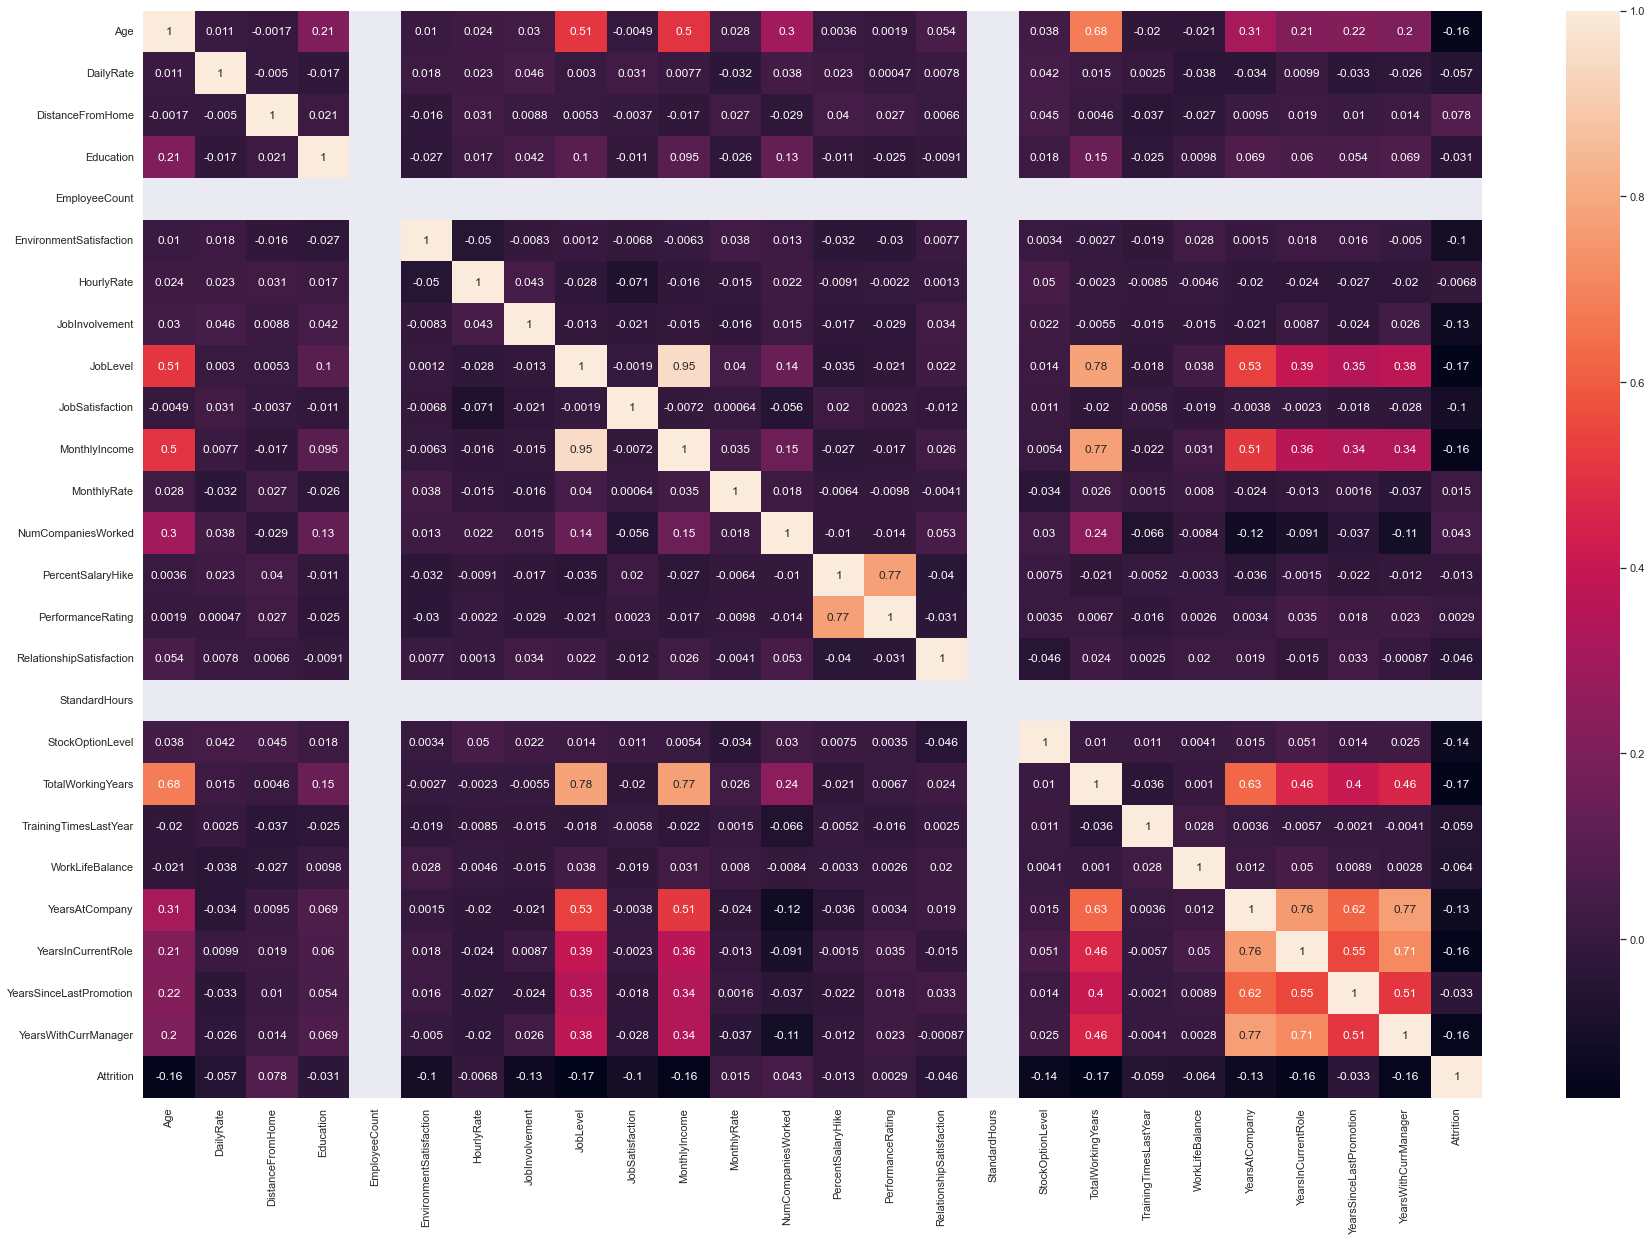

In [55]:
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(data_combined.corr(),annot=True)

In [56]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [57]:
corr_features = correlation(data_combined,0.75)
# Greater than 0.75 correlation can be removed

In [68]:
corr_features

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [70]:
num

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,YearsAtCompany
0,41.0,1102.0,1,94,19479.0,6.0
1,49.0,279.0,8,61,24907.0,10.0
2,37.0,1373.0,2,92,2396.0,0.0
3,33.0,1392.0,3,56,23159.0,8.0
4,27.0,591.0,2,40,16632.0,2.0
...,...,...,...,...,...,...
1465,36.0,884.0,23,41,12290.0,5.0
1466,39.0,613.0,6,42,21457.0,7.0
1467,27.0,155.0,4,87,5174.0,6.0
1468,49.0,1023.0,2,63,13243.0,9.0


In [71]:
# num = num.drop(['MonthlyIncome','TotalWorkingYears'],axis=1)
char = char.drop(['PerformanceRating','YearsInCurrentRole','YearsWithCurrManager'],axis=1)

In [72]:
sns.set(rc = {'figure.figsize':(7,5)})

# Data Transforming

In [73]:
from sklearn.preprocessing import KBinsDiscretizer

discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')

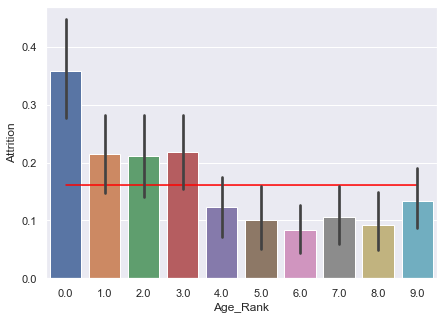

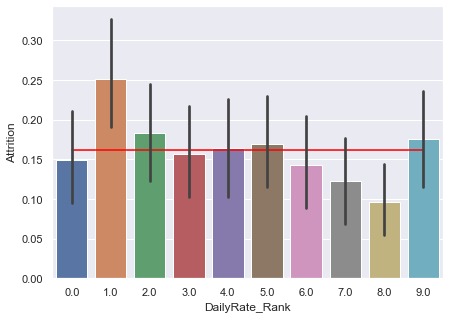

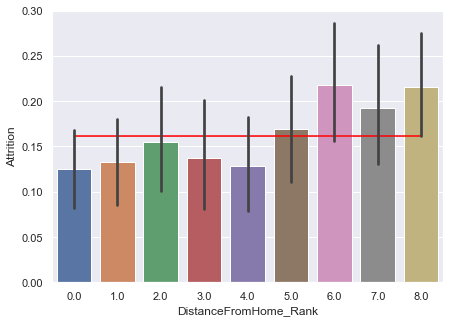

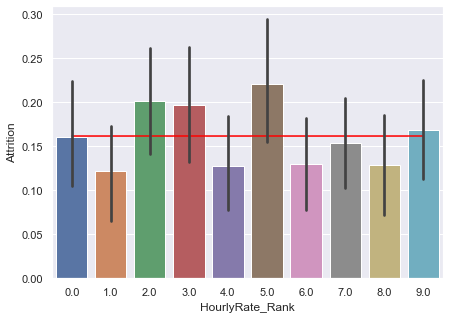

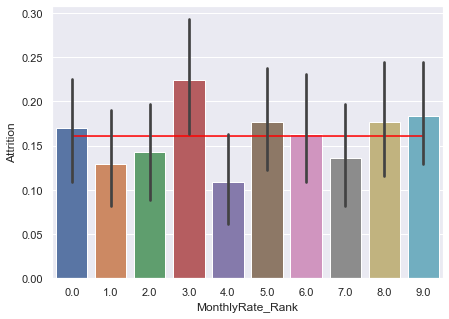

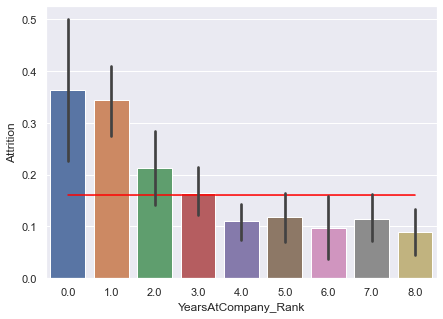

In [74]:
num_bin_combined=pd.concat([num_binned,target],axis=1,join='inner')

from numpy import mean

for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=num_bin_combined['Attrition'].mean(),data=num_bin_combined,color='red')
    sns.barplot(x=col,y='Attrition',data=num_bin_combined,estimator=mean )
plt.show()

In [75]:
num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,YearsAtCompany
0,41.0,1102.0,1,94,19479.0,6.0
1,49.0,279.0,8,61,24907.0,10.0
2,37.0,1373.0,2,92,2396.0,0.0
3,33.0,1392.0,3,56,23159.0,8.0
4,27.0,591.0,2,40,16632.0,2.0


In [76]:
num_bin_combined.head()

,Age_Rank,DailyRate_Rank,DistanceFromHome_Rank,HourlyRate_Rank,MonthlyRate_Rank,YearsAtCompany_Rank,Attrition
0,7.0,7.0,0.0,9.0,7.0,4.0,1
1,8.0,1.0,4.0,4.0,9.0,7.0,0
2,5.0,9.0,1.0,8.0,0.0,0.0,1
3,3.0,9.0,2.0,3.0,8.0,5.0,0
4,1.0,3.0,1.0,1.0,5.0,2.0,0


In [77]:
num_bin_combined.groupby(by='Age_Rank')['Attrition'].sum().sort_values()

Age_Rank
5.0    12
6.0    13
8.0    13
7.0    16
4.0    19
9.0    23
2.0    27
1.0    29
3.0    41
0.0    44
Name: Attrition, dtype: int32

In [78]:
cond_list = [(num_binned['Age_Rank'].isin([0.0,3.0])),
             (num_binned['Age_Rank'].isin([1.0,2.0])),
             (num_binned['Age_Rank']>=4.0)]
choice_list = ['High Attrition Age','Mid Attrition Age','Low Attrition Age']
char['Age_Category'] = np.select(cond_list,choice_list)

In [79]:
num_bin_combined.groupby(by='DailyRate_Rank')['Attrition'].sum().sort_values()

DailyRate_Rank
8.0    14
7.0    18
6.0    21
0.0    22
3.0    23
4.0    24
5.0    25
9.0    26
2.0    27
1.0    37
Name: Attrition, dtype: int32

In [80]:
cond_list = [(num_binned['DailyRate_Rank']==1.0),
             (num_binned['DailyRate_Rank'].isin([2.0,4.0,5.0,9.0])),
             (num_binned['DailyRate_Rank'].isin([0.0,3.0,6.0,7.0,8.0]))]
choice_list = ['High Attrition DailyRate','Mid Attrition DailyRate','Low Attrition DailyRate']
char['DailyRate_Category'] = np.select(cond_list,choice_list)

In [81]:
num_bin_combined.groupby(by='DistanceFromHome_Rank')['Attrition'].sum()

DistanceFromHome_Rank
0.0    26
1.0    28
2.0    23
3.0    17
4.0    21
5.0    29
6.0    32
7.0    25
8.0    36
Name: Attrition, dtype: int32

In [82]:
cond_list = [(num_binned['DistanceFromHome_Rank'].isin([6.0,8.0])),
             (num_binned['DistanceFromHome_Rank'].isin([0.0,1.0,5.0,7.0])),
             (num_binned['DistanceFromHome_Rank'].isin([2.0,3.0,4.0]))]
choice_list = ['High Attrition DistanceFromHome','Mid Attrition DistanceFromHome','Low Attrition DistanceFromHome']
char['DistanceFromHome_Category'] = np.select(cond_list,choice_list)

In [83]:
num_bin_combined.groupby(by='HourlyRate_Rank')['Attrition'].sum().sort_values()

HourlyRate_Rank
1.0    17
4.0    18
8.0    18
6.0    20
0.0    23
7.0    24
9.0    27
2.0    30
3.0    30
5.0    30
Name: Attrition, dtype: int32

In [84]:
cond_list = [(num_binned['HourlyRate_Rank'].isin([2.0,3.0,5.0])),
             (num_binned['HourlyRate_Rank'].isin([0.0,7.0,9.0])),
             (num_binned['HourlyRate_Rank'].isin([1.0,4.0,6.0,8.0]))]
choice_list = ['High Attrition HourlyRate','Mid Attrition HourlyRate','Low Attrition HourlyRate']
char['HourlyRate_Category'] = np.select(cond_list,choice_list)

In [85]:
num_bin_combined.groupby(by='MonthlyRate_Rank')['Attrition'].sum().sort_values()

MonthlyRate_Rank
4.0    16
1.0    19
7.0    20
2.0    21
6.0    24
0.0    25
5.0    26
8.0    26
9.0    27
3.0    33
Name: Attrition, dtype: int32

In [86]:
cond_list = [(num_binned['MonthlyRate_Rank'].isin([3.0])),
             (num_binned['MonthlyRate_Rank'].isin([0.0,5.0,6.0,8.0,9.0])),
             (num_binned['MonthlyRate_Rank'].isin([1.0,2.0,4.0,7.0]))]
choice_list = ['High Attrition MonthlyRate','Mid Attrition MonthlyRate','Low Attrition MonthlyRate']
char['MonthlyRate_Category'] = np.select(cond_list,choice_list)

In [87]:
num_bin_combined.groupby(by='YearsAtCompany_Rank')['Attrition'].sum().sort_values()

YearsAtCompany_Rank
6.0     8
8.0    14
0.0    16
5.0    20
7.0    24
2.0    27
4.0    30
3.0    39
1.0    59
Name: Attrition, dtype: int32

In [88]:
cond_list = [(num_binned['YearsAtCompany_Rank'].isin([1.0])),
             (num_binned['YearsAtCompany_Rank'].isin([2.0,3.0,4.0])),
             (num_binned['YearsAtCompany_Rank'].isin([0.0,5.0,6.0,7.0,8.0]))]
choice_list = ['High Attrition YearsAtCompany','Mid Attrition YearsAtCompany','Low Attrition YearsAtCompany']
char['YearsAtCompany_Category'] = np.select(cond_list,choice_list)

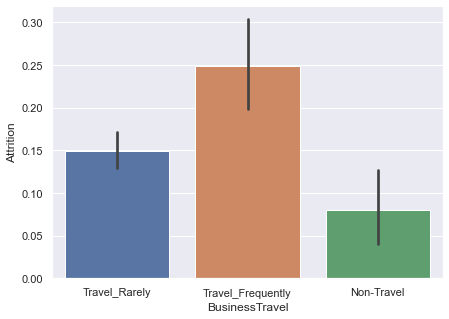

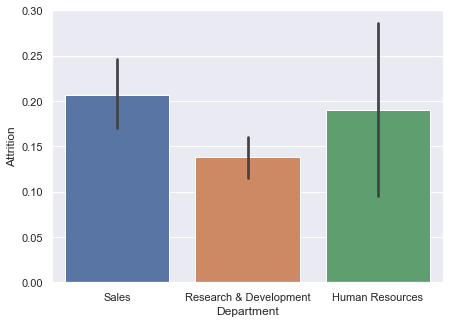

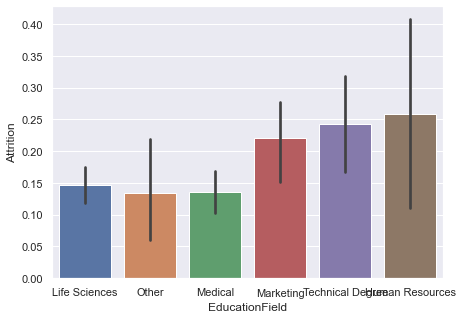

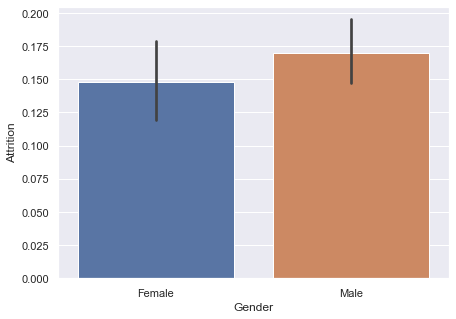

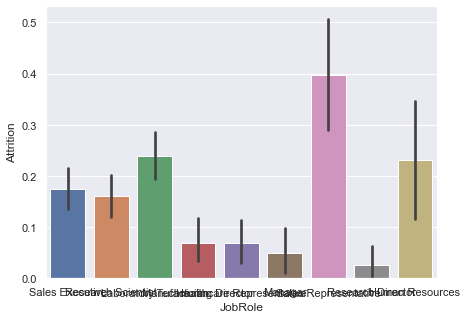

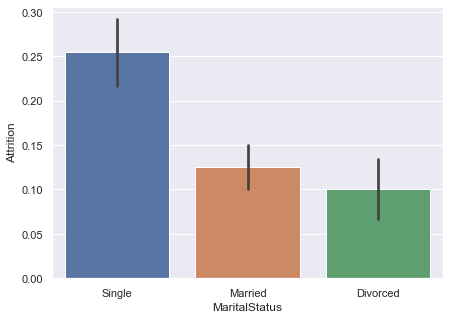

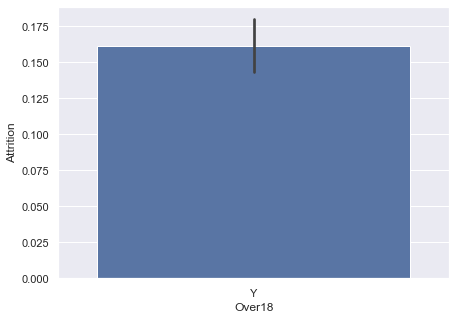

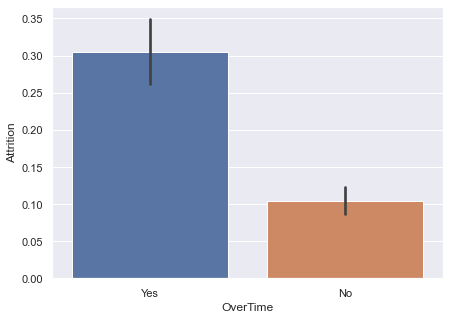

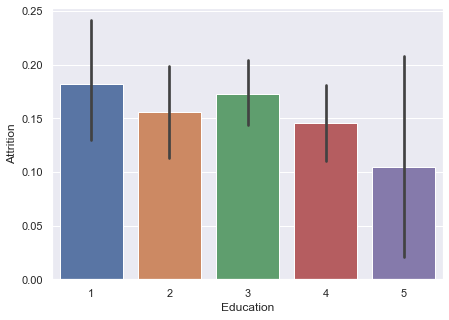

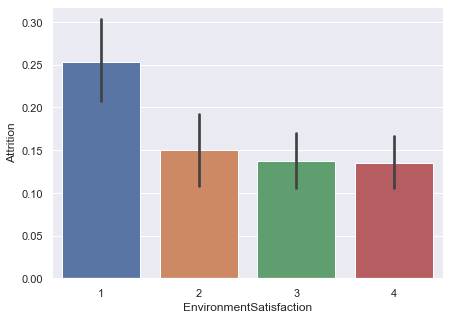

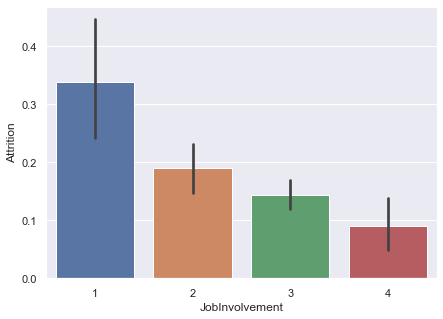

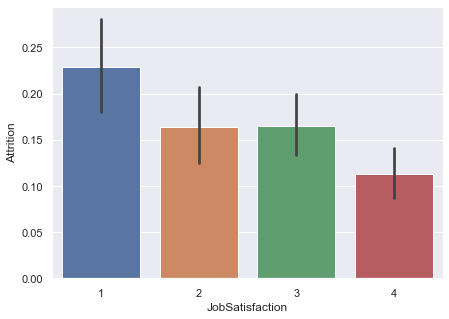

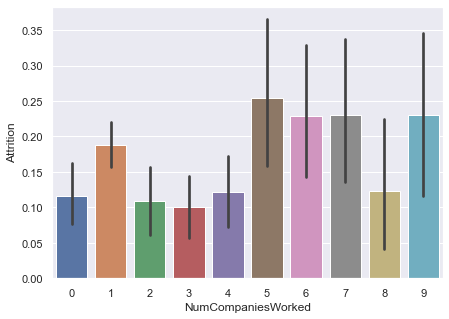

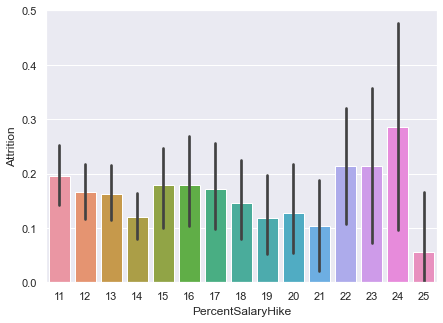

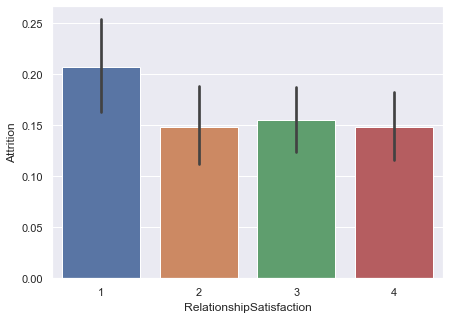

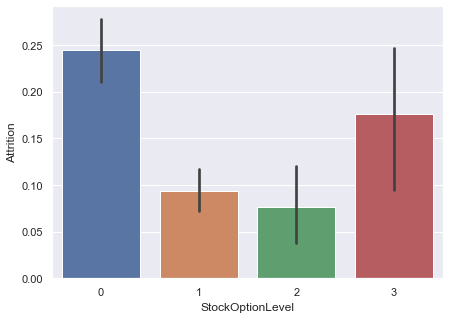

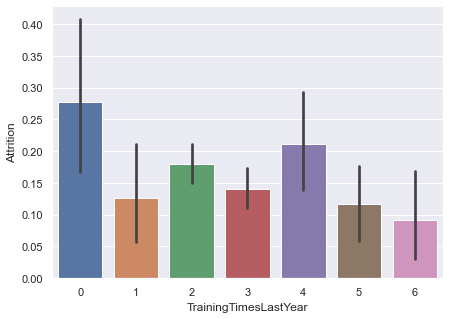

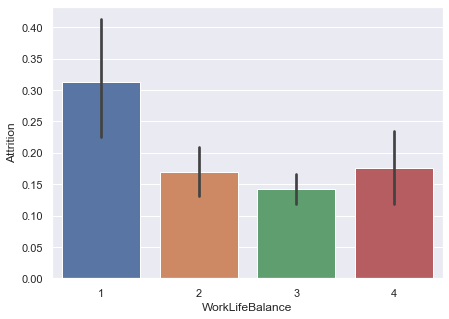

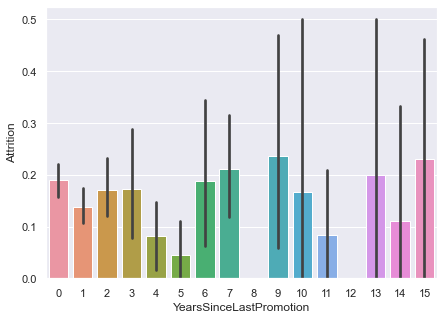

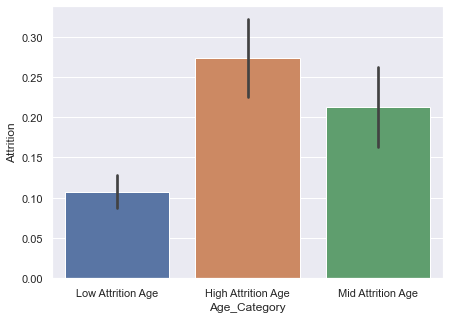

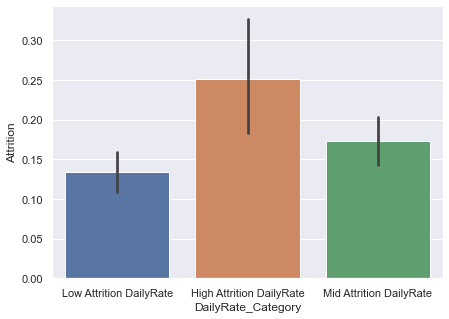

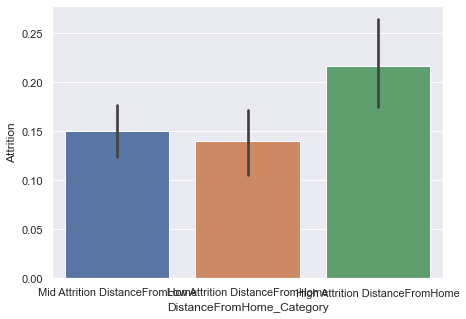

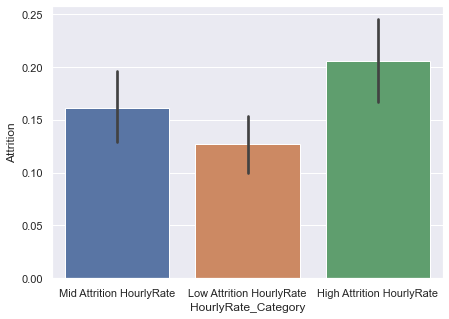

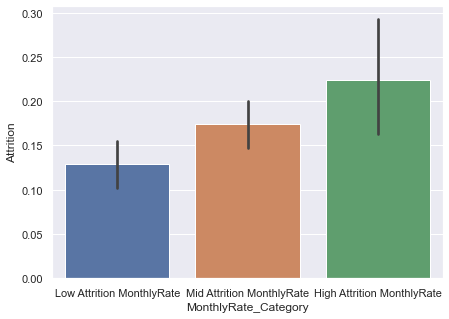

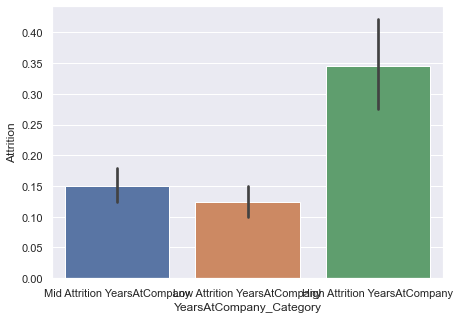

In [89]:
char_combined=pd.concat([char,target],axis=1,join='inner')

from numpy import mean

for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="Attrition",data=char_combined,estimator=mean)
plt.show()

In [90]:
char = char.drop(['Over18','Gender'],axis=1)

In [91]:
char_combined.groupby(by='PercentSalaryHike')['Attrition'].sum()

PercentSalaryHike
11    41
12    33
13    34
14    24
15    18
16    14
17    14
18    13
19     9
20     7
21     5
22    12
23     6
24     6
25     1
Name: Attrition, dtype: int32

In [92]:
cond_list = [(char_combined['PercentSalaryHike'].isin([11,12,13])),
             (char_combined['PercentSalaryHike'].isin([14,15])),
             (char_combined['PercentSalaryHike'].isin([16,17,18,19,20,21,22,23,24,25]))]
choice_list = ['High Attrition PercentSalaryHike','Mid Attrition PercentSalaryHike','Low Attrition PercentSalaryHike']
char['PercentSalaryHike_Category'] = np.select(cond_list,choice_list)

In [93]:
char_combined.groupby(by='YearsSinceLastPromotion')['Attrition'].sum()

YearsSinceLastPromotion
0     110
1      49
2      27
3       9
4       5
5       2
6       6
7      16
8       0
9       4
10      1
11      2
12      0
13      2
14      1
15      3
Name: Attrition, dtype: int32

In [94]:
cond_list = [(char_combined['YearsSinceLastPromotion'].isin([0])),
             (char_combined['YearsSinceLastPromotion'].isin([1,2,7])),
             (char_combined['YearsSinceLastPromotion'].isin([3,4,5,6,8,9,10,11,12,13,14,15]))]
choice_list = ['High Attrition YearsSinceLastPromotion','Mid Attrition YearsSinceLastPromotion','Low Attrition YearsSinceLastPromotion']
char['YearsSinceLastPromotion_Category'] = np.select(cond_list,choice_list)

In [95]:
char = char.drop(['PercentSalaryHike','YearsSinceLastPromotion'],axis=1)

In [96]:
data_all = char

In [97]:
data_all.head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,Age_Category,DailyRate_Category,DistanceFromHome_Category,HourlyRate_Category,MonthlyRate_Category,YearsAtCompany_Category,PercentSalaryHike_Category,YearsSinceLastPromotion_Category
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Yes,2,2,3,4,...,0,1,Low Attrition Age,Low Attrition DailyRate,Mid Attrition DistanceFromHome,Mid Attrition HourlyRate,Low Attrition MonthlyRate,Mid Attrition YearsAtCompany,High Attrition PercentSalaryHike,High Attrition YearsSinceLastPromotion
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,No,1,3,2,2,...,3,3,Low Attrition Age,High Attrition DailyRate,Low Attrition DistanceFromHome,Low Attrition HourlyRate,Mid Attrition MonthlyRate,Low Attrition YearsAtCompany,Low Attrition PercentSalaryHike,Mid Attrition YearsSinceLastPromotion
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Yes,2,4,2,3,...,3,3,Low Attrition Age,Mid Attrition DailyRate,Mid Attrition DistanceFromHome,Low Attrition HourlyRate,Mid Attrition MonthlyRate,Low Attrition YearsAtCompany,Mid Attrition PercentSalaryHike,High Attrition YearsSinceLastPromotion
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Yes,4,4,3,3,...,3,3,High Attrition Age,Mid Attrition DailyRate,Low Attrition DistanceFromHome,High Attrition HourlyRate,Mid Attrition MonthlyRate,Low Attrition YearsAtCompany,High Attrition PercentSalaryHike,Low Attrition YearsSinceLastPromotion
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,No,1,1,3,2,...,3,3,Mid Attrition Age,Low Attrition DailyRate,Mid Attrition DistanceFromHome,Low Attrition HourlyRate,Mid Attrition MonthlyRate,Mid Attrition YearsAtCompany,High Attrition PercentSalaryHike,Mid Attrition YearsSinceLastPromotion


# Data Encoding

In [98]:
data_dum = pd.get_dummies(data_all, drop_first = True)
data_dum.shape

(1470, 45)

In [99]:
data_dum.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,BusinessTravel_Travel_Frequently,...,HourlyRate_Category_Low Attrition HourlyRate,HourlyRate_Category_Mid Attrition HourlyRate,MonthlyRate_Category_Low Attrition MonthlyRate,MonthlyRate_Category_Mid Attrition MonthlyRate,YearsAtCompany_Category_Low Attrition YearsAtCompany,YearsAtCompany_Category_Mid Attrition YearsAtCompany,PercentSalaryHike_Category_Low Attrition PercentSalaryHike,PercentSalaryHike_Category_Mid Attrition PercentSalaryHike,YearsSinceLastPromotion_Category_Low Attrition YearsSinceLastPromotion,YearsSinceLastPromotion_Category_Mid Attrition YearsSinceLastPromotion
0,2,2,3,4,8,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
1,1,3,2,2,1,4,1,3,3,1,...,1,0,0,1,1,0,1,0,0,1
2,2,4,2,3,6,2,0,3,3,0,...,1,0,0,1,1,0,0,1,0,0
3,4,4,3,3,1,3,0,3,3,1,...,0,0,0,1,1,0,0,0,1,0
4,1,1,3,2,9,4,1,3,3,0,...,1,0,0,1,0,1,0,0,0,1


In [100]:
data_dum.columns

Index(['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes',
       'Age_Category_Low Attrition Age', 'Age_Category_Mid Attrition Age',
       'DailyRate_Category_Low Attrition DailyRate',
       'DailyRate_Catego

# Feature Selection

In [101]:
from sklearn.feature_selection import SelectKBest,chi2

selector = SelectKBest(chi2,k=40)
selector.fit_transform(data_dum,target)
cols = selector.get_support(indices=True)
data_select_features = data_dum.iloc[:,cols]

In [102]:
data_select_features.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,BusinessTravel_Travel_Frequently,...,DailyRate_Category_Mid Attrition DailyRate,DistanceFromHome_Category_Low Attrition DistanceFromHome,DistanceFromHome_Category_Mid Attrition DistanceFromHome,HourlyRate_Category_Low Attrition HourlyRate,MonthlyRate_Category_Low Attrition MonthlyRate,MonthlyRate_Category_Mid Attrition MonthlyRate,YearsAtCompany_Category_Low Attrition YearsAtCompany,YearsAtCompany_Category_Mid Attrition YearsAtCompany,PercentSalaryHike_Category_Mid Attrition PercentSalaryHike,YearsSinceLastPromotion_Category_Low Attrition YearsSinceLastPromotion
0,2,2,3,4,8,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1,3,2,2,1,4,1,3,3,1,...,0,1,0,1,0,1,1,0,0,0
2,2,4,2,3,6,2,0,3,3,0,...,1,0,1,1,0,1,1,0,1,0
3,4,4,3,3,1,3,0,3,3,1,...,1,1,0,0,0,1,1,0,0,1
4,1,1,3,2,9,4,1,3,3,0,...,0,0,1,1,0,1,0,1,0,0


# Train Validation Split

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(data_dum,target,test_size=0.3,random_state=1)

In [104]:
# Using SMOTE to balance classes

In [107]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)
oversampled_XVal, oversampled_YVal = sm.fit_resample(X_val, y_val)
oversampledTrain = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
oversampledTest=pd.concat([pd.DataFrame(oversampled_YVal), pd.DataFrame(oversampled_XVal)], axis=1)

# Model Selection

In [108]:
# Logistic Regression
# Decision tree
# KNN
# SVM
# Random Forest
# Naive Bayes
# GradientBoosting
# StackingClassifier

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4,max_iter=3000)
lrS = LogisticRegression(random_state=4,max_iter=3000)

In [110]:
# Logistic Regression Model Parameters Gridsearchcv
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
lr = LogisticRegression(random_state=4,max_iter=3000)
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
class_weight=['balanced']
# define grid search
grid = dict(penalty=penalty,C=c_values,class_weight=class_weight) # 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-3, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print(grid_result.best_params_)
print(grid_result.best_score_)

Best: 0.507110 using {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.496097 (0.082437) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'none'}
0.497886 (0.081307) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
0.496097 (0.082437) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'none'}
0.498619 (0.069071) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
0.496097 (0.082437) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'none'}
0.507110 (0.052020) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.496097 (0.082437) with: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'none'}
0.491271 (0.064171) with: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
0.496097 (0.082437) with: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'none'}
0.449947 (0.063816) with: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
{'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.5071101892880236


In [111]:
# Logistic Regression Model Parameters Gridsearchcv
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
lrS = LogisticRegression(random_state=4,max_iter=3000)
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
class_weight=['balanced']
# define grid search
gridS = dict(penalty=penalty,C=c_values,class_weight=class_weight) # 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_searchS = GridSearchCV(estimator=lrS, param_grid=gridS, n_jobs=-3, cv=cv, scoring='f1',error_score=0)
grid_resultS = grid_search.fit(oversampled_X, oversampled_Y)
# summarize results
print("Best: %f using %s" % (grid_resultS.best_score_, grid_resultS.best_params_))
meansS = grid_resultS.cv_results_['mean_test_score']
stdsS = grid_resultS.cv_results_['std_test_score']
paramsS = grid_resultS.cv_results_['params']
for mean, stdev, param in zip(meansS, stdsS, paramsS):
    print("%f (%f) with: %r" % (mean, stdev, param))
print(grid_resultS.best_params_)
print(grid_resultS.best_score_)

Best: 0.911224 using {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.909461 (0.023220) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'none'}
0.910116 (0.022831) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
0.909461 (0.023220) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'none'}
0.910636 (0.023001) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
0.909461 (0.023220) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'none'}
0.911224 (0.022416) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.909461 (0.023220) with: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'none'}
0.906329 (0.018027) with: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
0.909461 (0.023220) with: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'none'}
0.884296 (0.016489) with: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
{'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.9112238397021224


In [112]:
lrs=LogisticRegression(C= 0.1,class_weight='balanced',penalty='l2')
lrs.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced')

In [113]:
lrsS=LogisticRegression(C= 1.0,class_weight='balanced',penalty='l2')
lrsS.fit(oversampled_X,oversampled_Y)

LogisticRegression(class_weight='balanced')

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=4)
dtcS = DecisionTreeClassifier(criterion='gini',random_state=4)


In [115]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [7,11,15,19,23], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1,scoring='f1')
gscv_dtc.fit(X_train,y_train)

gscv_dtcS = GridSearchCV(dtcS, cv=10, param_grid=param_dist, n_jobs=-1,scoring='f1')
gscv_dtcS.fit(oversampled_X,oversampled_Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [7, 11, 15, 19, 23],
                         'min_samples_split': [50, 100, 150, 200, 250]},
             scoring='f1')

In [116]:
gscv_dtc.best_params_

{'max_depth': 7, 'min_samples_split': 50}

In [117]:
gscv_dtcS.best_params_

{'max_depth': 11, 'min_samples_split': 50}

In [118]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=4)

In [119]:
dtcS=DecisionTreeClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
dtcS.fit(oversampled_X,oversampled_Y)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=4)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
kncS = KNeighborsClassifier()

In [121]:
from sklearn.model_selection import GridSearchCV
param_dist = {'n_neighbors': list(range(4, 31))}
gscv_knc = GridSearchCV(knc, cv=10, param_grid=param_dist, n_jobs=-1,scoring='f1')
gscv_knc.fit(X_train,y_train)
gscv_kncS = GridSearchCV(kncS, cv=10, param_grid=param_dist, n_jobs=-1,scoring='f1')
gscv_kncS.fit(oversampled_X,oversampled_Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                         25, 26, 27, 28, 29, 30]},
             scoring='f1')

In [122]:
gscv_knc.best_params_

{'n_neighbors': 7}

In [123]:
gscv_kncS.best_params_

{'n_neighbors': 4}

In [124]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [125]:
kncS=KNeighborsClassifier(n_neighbors=4)
kncS.fit(oversampled_X,oversampled_Y)

KNeighborsClassifier(n_neighbors=4)

In [126]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',random_state=4)
svcS = SVC(kernel='rbf',random_state=4)

In [127]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C': [1, 10, 100, 1000], 'degree': [1, 2, 3]}
gscv_svc = GridSearchCV(svc, cv=10, param_grid=param_dist, n_jobs=-1,scoring='f1')
gscv_svc.fit(X_train,y_train)

gscv_svcS = GridSearchCV(svcS, cv=10, param_grid=param_dist, n_jobs=-1,scoring='f1')
gscv_svcS.fit(oversampled_X,oversampled_Y)

GridSearchCV(cv=10, estimator=SVC(random_state=4), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'degree': [1, 2, 3]},
             scoring='f1')

In [128]:
gscv_svc.best_params_

{'C': 10, 'degree': 1}

In [129]:
gscv_svcS.best_params_

{'C': 10, 'degree': 1}

In [130]:
svc=SVC(C=100,kernel='rbf',degree=1,random_state=4,probability=True)
svc.fit(X_train,y_train)

SVC(C=100, degree=1, probability=True, random_state=4)

In [131]:
svcS=SVC(C=10,kernel='rbf',degree=1,random_state=4,probability=True)
svcS.fit(oversampled_X,oversampled_Y)

SVC(C=10, degree=1, probability=True, random_state=4)

In [132]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',random_state=4)
rfcS = RandomForestClassifier(criterion='gini',random_state=4)

In [133]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [ 7,11,15,19], 'min_samples_split': [20,50, 100, 150, 200, 250],'max_features':[25,30,35,40]}
gscv_rfc = GridSearchCV(rfc, cv=10, param_grid=param_dist, n_jobs=-3)
gscv_rfc.fit(X_train,y_train)

gscv_rfcS = GridSearchCV(rfcS, cv=10, param_grid=param_dist, n_jobs=-3)
gscv_rfcS.fit(oversampled_X,oversampled_Y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4), n_jobs=-3,
             param_grid={'max_depth': [7, 11, 15, 19],
                         'max_features': [25, 30, 35, 40],
                         'min_samples_split': [20, 50, 100, 150, 200, 250]})

In [134]:
gscv_rfc.best_params_

{'max_depth': 7, 'max_features': 40, 'min_samples_split': 50}

In [135]:
gscv_rfcS.best_params_

{'max_depth': 15, 'max_features': 25, 'min_samples_split': 20}

In [136]:
rfc=RandomForestClassifier(criterion='gini',random_state=4,max_depth=15,min_samples_split=20,n_estimators=200,max_features=30)
rfc.fit(X_train,y_train)



RandomForestClassifier(max_depth=15, max_features=30, min_samples_split=20,
                       n_estimators=200, random_state=4)

In [137]:
rfcS=RandomForestClassifier(criterion='gini',random_state=5,max_depth=11,min_samples_split=20,n_estimators=200,max_features=25)
rfcS.fit(oversampled_X,oversampled_Y)

RandomForestClassifier(max_depth=11, max_features=25, min_samples_split=20,
                       n_estimators=200, random_state=5)

In [138]:
feature_importances_rfc=pd.DataFrame(rfc.feature_importances_,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rfc

,importance
OverTime_Yes,0.135137
JobInvolvement,0.060190
TrainingTimesLastYear,0.059415
StockOptionLevel,0.059005
EnvironmentSatisfaction,0.056472
WorkLifeBalance,0.050996
NumCompaniesWorked,0.049840
MaritalStatus_Single,0.046046
EducationField_Marketing,0.042151
JobRole_Laboratory Technician,0.042071


In [139]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnbS = GaussianNB()
gnbS.fit(X_train,y_train)

GaussianNB()

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(criterion='mse',random_state=4)
gbcS = GradientBoostingClassifier(criterion='mse',random_state=4)

In [141]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
gscv_gbc = GridSearchCV(gbc, cv = 10, param_grid=param_dist,n_jobs = -1)
gscv_gbc.fit(X_train,y_train)

gscv_gbcS = GridSearchCV(gbcS, cv = 10, param_grid=param_dist,n_jobs = -1)
gscv_gbcS.fit(oversampled_X,oversampled_Y)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [143]:
gscv_gbc.best_params_

{'max_depth': 5, 'min_samples_split': 250}

In [144]:
gscv_gbcS.best_params_

{'max_depth': 7, 'min_samples_split': 150}

In [145]:
gbc=GradientBoostingClassifier(criterion='mse',random_state=4,max_depth=6,min_samples_split=250)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=250,
                           random_state=4)

In [146]:
gbcS=GradientBoostingClassifier(criterion='mse',random_state=4,max_depth=5,min_samples_split=50)
gbcS.fit(oversampled_X,oversampled_Y)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=50,
                           random_state=4)

In [147]:
feature_importances_gbc=pd.DataFrame(gbc.feature_importances_,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
feature_importances_gbc

,importance
OverTime_Yes,0.151685
JobInvolvement,0.075340
StockOptionLevel,0.064475
EnvironmentSatisfaction,0.059039
TrainingTimesLastYear,0.056605
Age_Category_Low Attrition Age,0.054778
MaritalStatus_Single,0.053784
NumCompaniesWorked,0.047498
JobRole_Sales Representative,0.044851
JobRole_Laboratory Technician,0.040970


In [148]:
base_learners = [
                 ('rfc', RandomForestClassifier(criterion='gini',random_state=4,max_depth=6,min_samples_split=50)),
                 ('gbc', GradientBoostingClassifier(criterion='mse',random_state=4,max_depth=6,min_samples_split=50))  
                ] 

In [149]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
sc.fit(X_train, y_train)

scS = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
scS.fit(oversampled_X, oversampled_Y)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=4)),
                               ('gbc',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=4))],
                   final_estimator=LogisticRegression())

# Feature Importance

                                                    importance
OverTime_Yes                                          1.191431
JobRole_Laboratory Technician                         0.784084
BusinessTravel_Travel_Frequently                      0.731432
MaritalStatus_Single                                  0.547210
JobRole_Sales Representative                          0.546223
EducationField_Technical Degree                       0.478385
JobRole_Human Resources                               0.300712
BusinessTravel_Travel_Rarely                          0.240767
YearsSinceLastPromotion_Category_Low Attrition ...    0.176097
Department_Sales                                      0.173012
EducationField_Marketing                              0.098104
MaritalStatus_Married                                 0.092435
NumCompaniesWorked                                    0.080218
Education                                             0.065925
JobRole_Research Scientist                            0

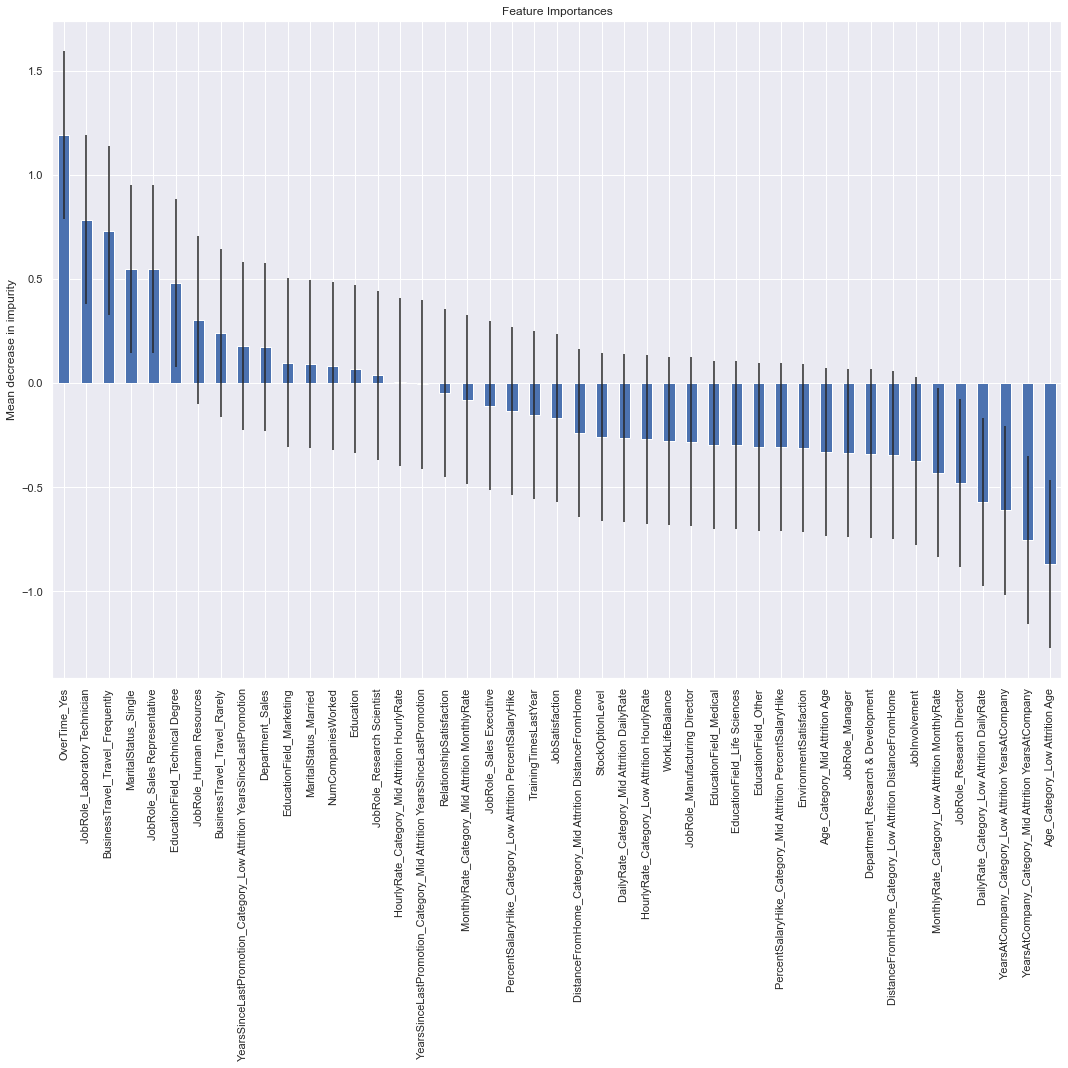

In [150]:
# Logistic Regression Feature Importance
def Model_importances(model,data):
    feature_names = X_train.columns
    importances = model.coef_[0]
    std = np.std(importances, axis=0)
    model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
    fig, axes = plt.subplots(figsize=(15,15))
    model_importances.plot.bar(yerr=std, ax=axes)
    axes.set_title("Feature Importances")
    axes.set_ylabel("Mean decrease in impurity")
    feature_importancesl=pd.DataFrame(importances,
                                        index=X_train.columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importancesl)                                    
    fig.tight_layout()
Model_importances(lrs,data_dum)

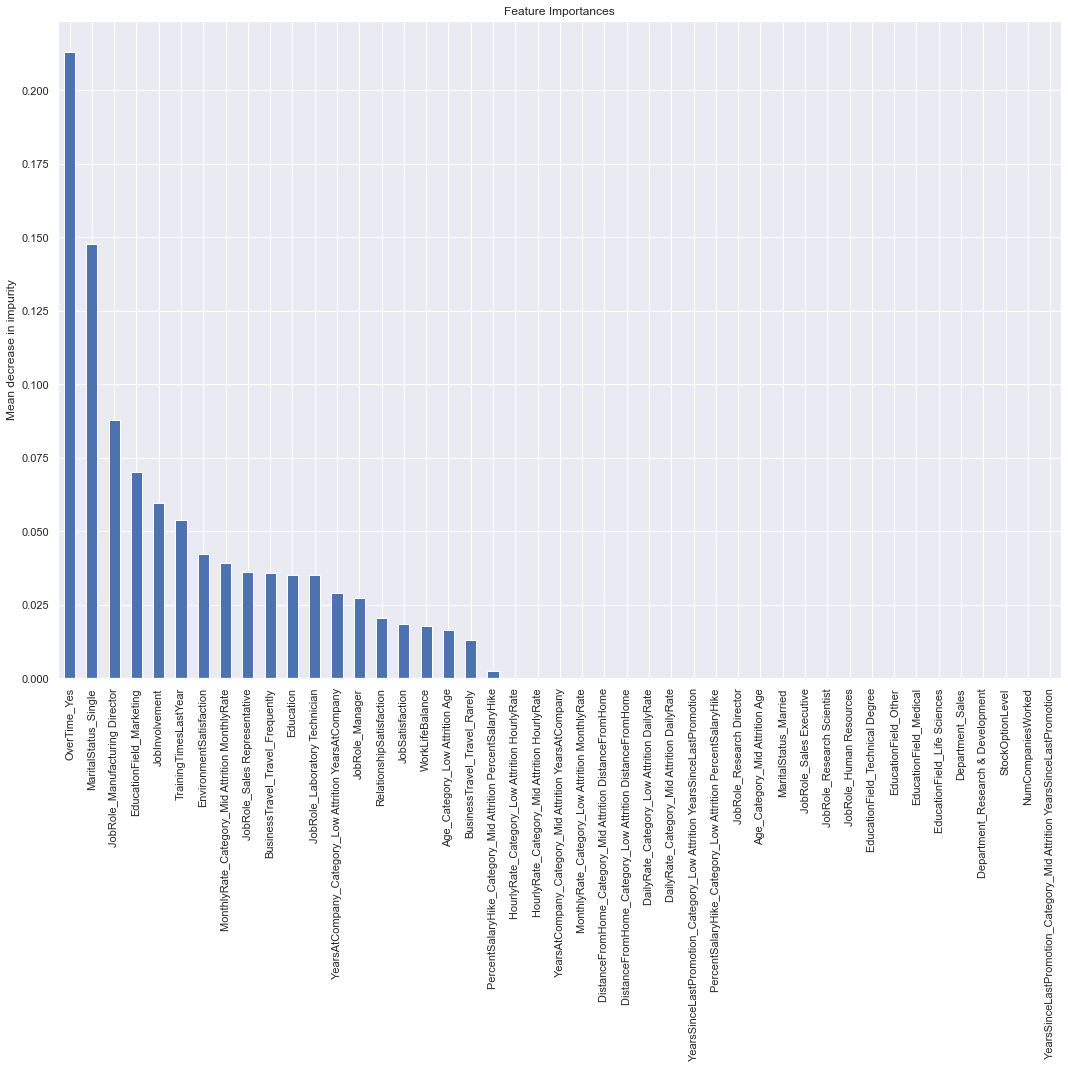

In [151]:
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(15,15))
  model_importances.plot.bar(ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()
# Decision Tree
Model_importances(dtc,data_dum)

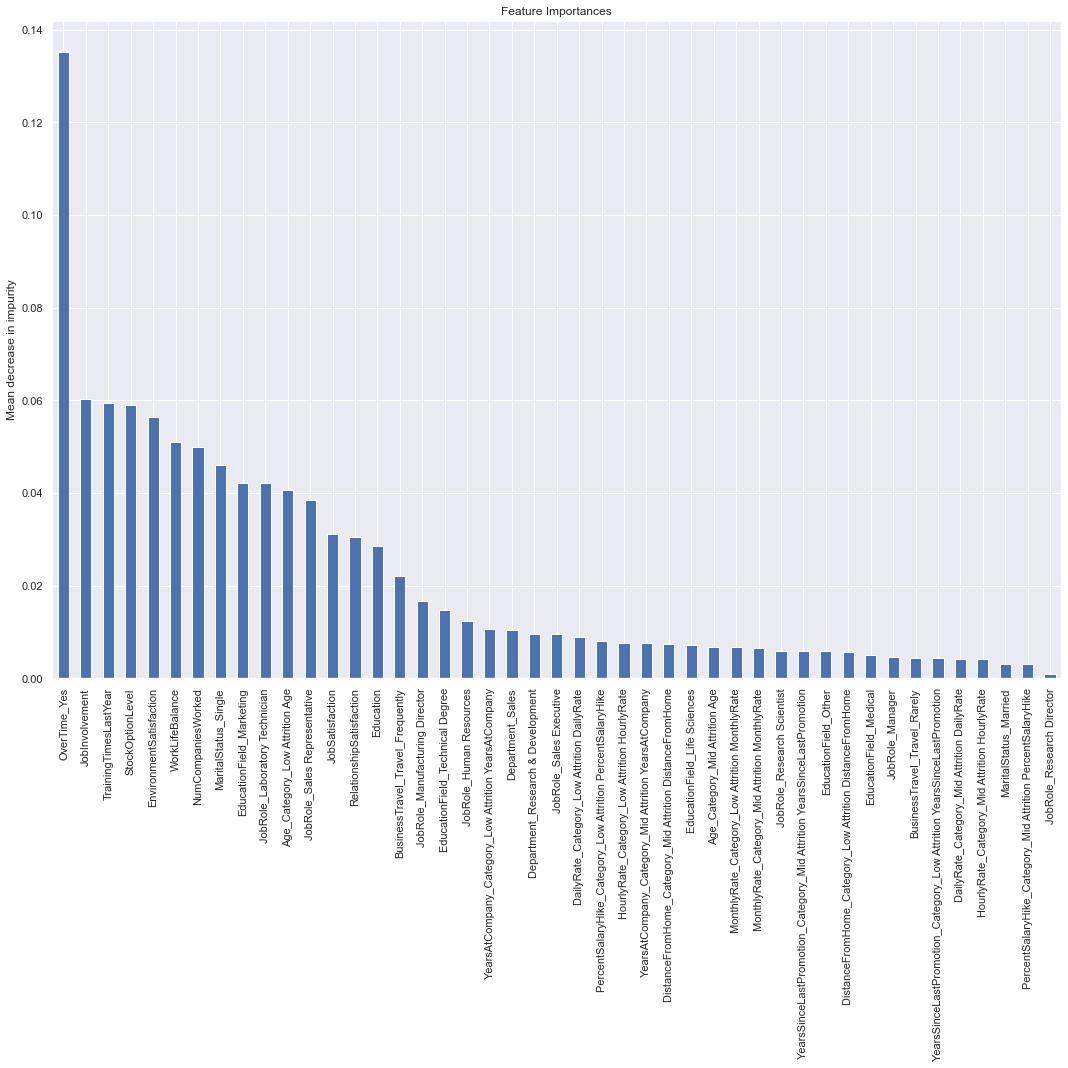

In [152]:
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(15,15))
  model_importances.plot.bar(ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()
# Random Forest
Model_importances(rfc,data_dum)

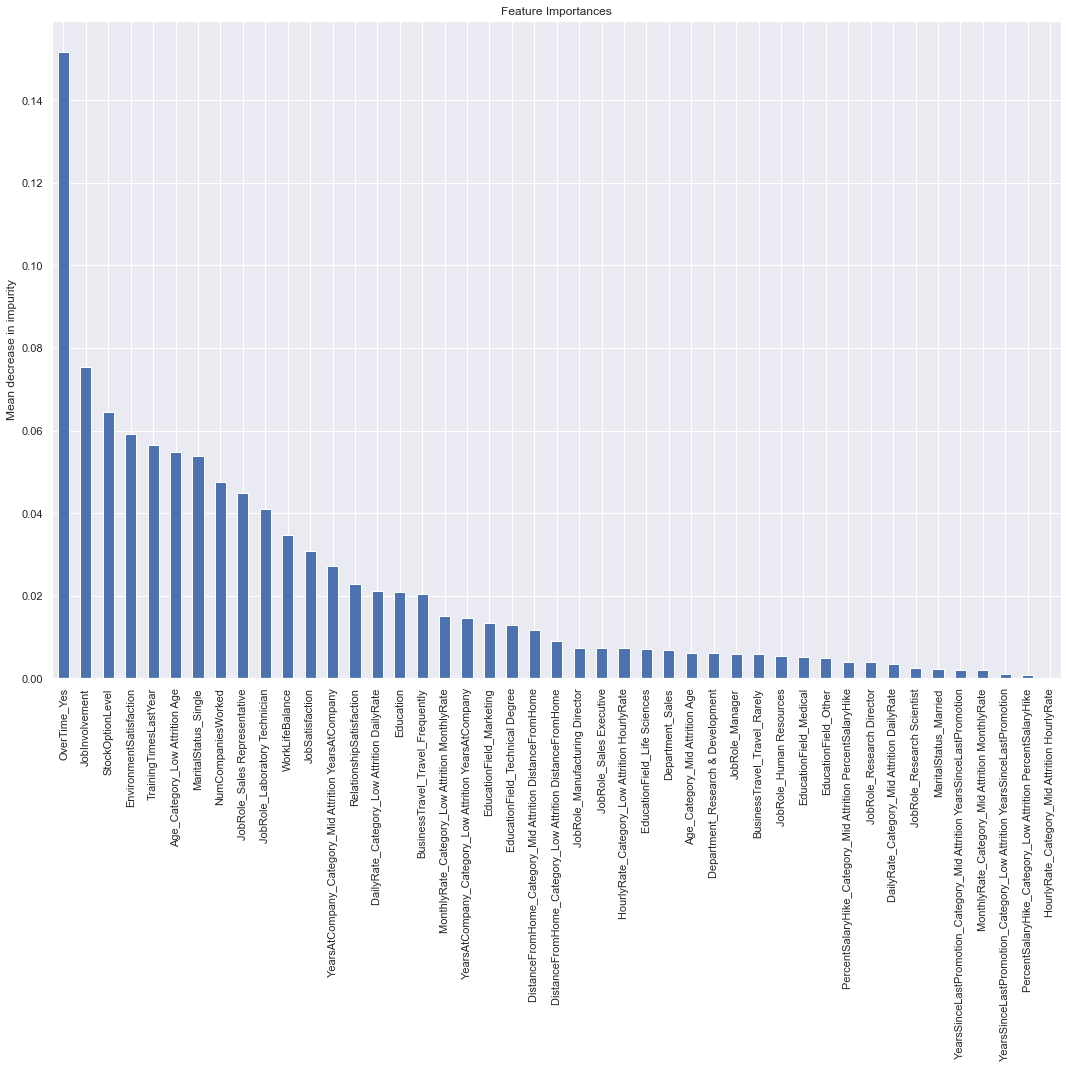

In [153]:
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(15,15))
  model_importances.plot.bar(ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()
#Gradient Boosting CLassifier 
Model_importances(gbc,data_dum)

# Model Evaluation

In [154]:
# Imbalanced Data 
y_pred_lr=lrs.predict(X_val)
y_pred_dtc=dtc.predict(X_val)
y_pred_knc=knc.predict(X_val)
y_pred_svc=svc.predict(X_val)
y_pred_rfc=rfc.predict(X_val)
y_pred_gnb=gnb.predict(X_val)
y_pred_gbc=gbc.predict(X_val)
y_pred_sc=sc.predict(X_val)

In [155]:
pd.DataFrame(y_pred_rfc).value_counts()

0    426
1     15
dtype: int64

In [156]:
pd.DataFrame(y_pred_svc).value_counts()

0    362
1     79
dtype: int64

In [157]:
# SMOTE balanced 

In [158]:
# Balanced Data through SMOTE
y_pred_lrS=lrsS.predict(oversampled_XVal)
y_pred_dtcS=dtcS.predict(oversampled_XVal)
y_pred_kncS=kncS.predict(oversampled_XVal)
y_pred_svcS=svcS.predict(oversampled_XVal)
y_pred_rfcS=rfcS.predict(oversampled_XVal)
y_pred_gnbS=gnbS.predict(oversampled_XVal)
y_pred_gbcS=gbcS.predict(oversampled_XVal)
y_pred_scS=scS.predict(oversampled_XVal)

In [159]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Structured data better to go with Accuracy Score
# UnStructured data better to go with Recall Score

In [160]:
# Logistic Regression

In [161]:
print('Logistic Regression')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_lr))
print("Precision",metrics.precision_score(y_val,y_pred_lr))
print("Recall",metrics.recall_score(y_val,y_pred_lr))
print("f1_score",metrics.f1_score(y_val,y_pred_lr))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_val,y_pred_lr))

Logistic Regression
Accuracy: 0.7687074829931972
Precision 0.41134751773049644
Recall 0.7532467532467533
f1_score 0.5321100917431193
cohen_kappa_score 0.39559819413092545


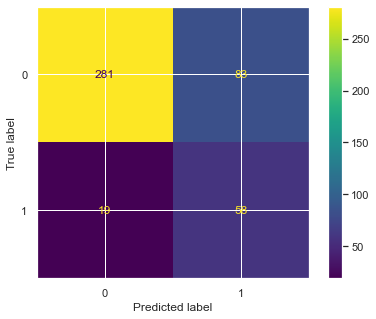

In [162]:
metrics.plot_confusion_matrix(lrs,X_val,y_val)

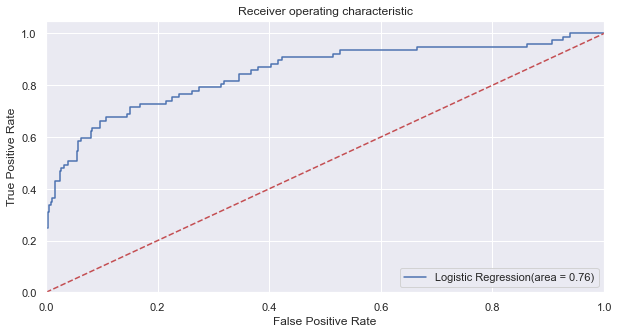

In [163]:
fig, axes = plt.subplots(figsize=(10,5))
# Logistic Regression AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val, lrs.predict(X_val))
tree_roc_auc=roc_auc_score(y_val, dtc.predict(X_val))
knc_roc_auc=roc_auc_score(y_val, knc.predict(X_val))
svc_roc_auc=roc_auc_score(y_val, svc.predict(X_val))
RF_roc_auc=roc_auc_score(y_val, rfc.predict(X_val))
GNB__roc_auc=roc_auc_score(y_val, gnb.predict(X_val))
GBC_roc_auc=roc_auc_score(y_val, gbc.predict(X_val))
SC_roc_auc=roc_auc_score(y_val, sc.predict(X_val))


fpr, tpr, thresholds = roc_curve(y_val, lrs.predict_proba(X_val)[:,1])
# fpr, tpr, thresholds = roc_curve(y_val, dtc.predict_proba(X_val)[:,1])
# fpr, tpr, thresholds = roc_curve(y_val, knc.predict_proba(X_val)[:,1])
# fpr, tpr, thresholds = roc_curve(y_val, svc.predict_proba(X_val)[:,1])
# fpr, tpr, thresholds = roc_curve(y_val, rfc.predict_proba(X_val)[:,1])
# fpr, tpr, thresholds = roc_curve(y_val, gnb.predict_proba(X_val)[:,1])
# fpr, tpr, thresholds = roc_curve(y_val, gbc.predict_proba(X_val)[:,1])
# fpr, tpr, thresholds = roc_curve(y_val, sc.predict_proba(X_val)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree(area = %0.2f)' % tree_roc_auc,color="green")
# plt.plot(fpr, tpr, label='Random Foreest Regression(area = %0.2f)' % knc_roc_auc)
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % svc_roc_auc,color="black")
# plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % RF_roc_auc)
# plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % GNB__roc_auc)
# plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % GBC_roc_auc)
# plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % SC_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

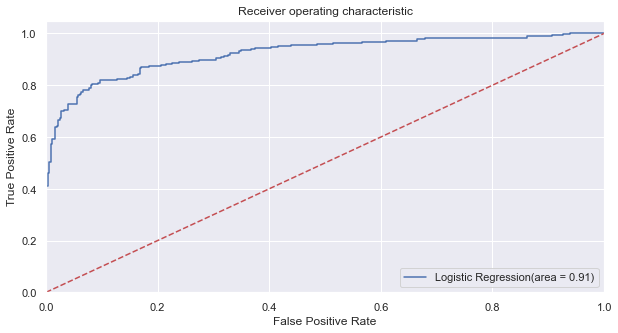

In [164]:
fig, axes = plt.subplots(figsize=(10,5))
# Logistic Regression AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(oversampled_YVal, lrsS.predict(oversampled_XVal))
tree_roc_auc=roc_auc_score(oversampled_YVal, dtcS.predict(oversampled_XVal))
knc_roc_auc=roc_auc_score(oversampled_YVal, kncS.predict(oversampled_XVal))
svc_roc_auc=roc_auc_score(oversampled_YVal, svcS.predict(oversampled_XVal))
RF_roc_auc=roc_auc_score(oversampled_YVal, rfcS.predict(oversampled_XVal))
GNB__roc_auc=roc_auc_score(oversampled_YVal, gnbS.predict(oversampled_XVal))
GBC_roc_auc=roc_auc_score(oversampled_YVal, gbcS.predict(oversampled_XVal))
SC_roc_auc=roc_auc_score(oversampled_YVal, scS.predict(oversampled_XVal))


fpr, tpr, thresholds = roc_curve(oversampled_YVal, lrs.predict_proba(oversampled_XVal)[:,1])
# fpr, tpr, thresholds = roc_curve(oversampled_YVal, dtc.predict_proba(oversampled_XVal)[:,1])
# fpr, tpr, thresholds = roc_curve(oversampled_YVal, knc.predict_proba(oversampled_XVal)[:,1])
# fpr, tpr, thresholds = roc_curve(oversampled_YVal, svc.predict_proba(oversampled_XVal)[:,1])
# fpr, tpr, thresholds = roc_curve(oversampled_YVal, rfc.predict_proba(oversampled_XVal)[:,1])
# fpr, tpr, thresholds = roc_curve(oversampled_YVal, gnb.predict_proba(oversampled_XVal)[:,1])
# fpr, tpr, thresholds = roc_curve(oversampled_YVal, gbc.predict_proba(oversampled_XVal)[:,1])
# fpr, tpr, thresholds = roc_curve(oversampled_YVal, sc.predict_proba(oversampled_XVal)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree(area = %0.2f)' % tree_roc_auc,color="green")
# plt.plot(fpr, tpr, label='Random Foreest Regression(area = %0.2f)' % knc_roc_auc)
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % svc_roc_auc,color="black")
# plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % RF_roc_auc)
# plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % GNB__roc_auc)
# plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % GBC_roc_auc)
# plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % SC_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROCH')
plt.show()

In [165]:
# Decision Tree

In [166]:
print('Decision Tree Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_dtc))
print("Precision",metrics.precision_score(y_val,y_pred_dtc))
print("Recall",metrics.recall_score(y_val,y_pred_dtc))
print("f1_score",metrics.f1_score(y_val,y_pred_dtc))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_val,y_pred_dtc))

Decision Tree Classifier
Accuracy: 0.8208616780045351
Precision 0.4666666666666667
Recall 0.18181818181818182
f1_score 0.26168224299065423
cohen_kappa_score 0.18154908732116426


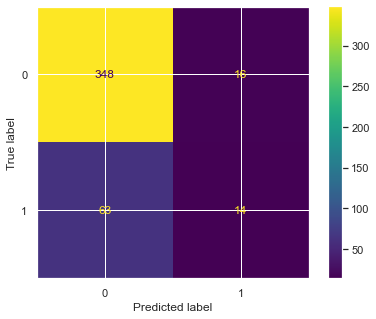

In [167]:
metrics.plot_confusion_matrix(dtc,X_val,y_val)

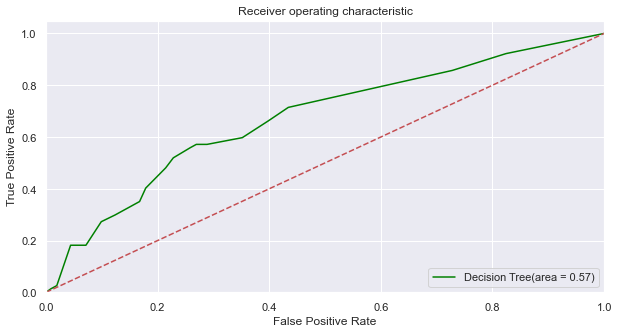

In [168]:
fig, axes = plt.subplots(figsize=(10,5))
# Decision Tree AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

tree_roc_auc=roc_auc_score(y_val, dtc.predict(X_val))

fpr, tpr, thresholds = roc_curve(y_val, dtc.predict_proba(X_val)[:,1])


plt.plot(fpr, tpr, label='Decision Tree(area = %0.2f)' % tree_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

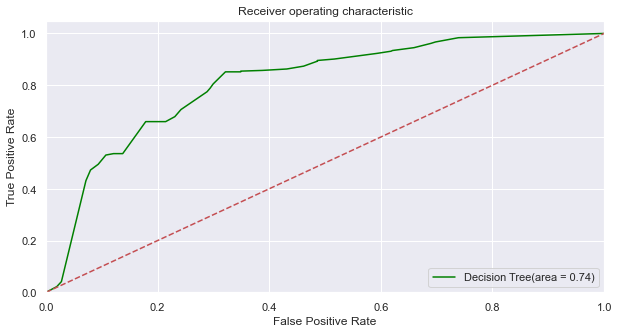

In [169]:
fig, axes = plt.subplots(figsize=(10,5))
# Decision Tree AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

tree_roc_auc=roc_auc_score(oversampled_YVal, dtcS.predict(oversampled_XVal))

fpr, tpr, thresholds = roc_curve(oversampled_YVal, dtcS.predict_proba(oversampled_XVal)[:,1])


plt.plot(fpr, tpr, label='Decision Tree(area = %0.2f)' % tree_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROCH')
plt.show()

In [170]:
# KNeighboursClassifier

In [171]:
print('KNeighbors Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_knc))
print("Precision",metrics.precision_score(y_val,y_pred_knc))
print("Recall",metrics.recall_score(y_val,y_pred_knc))
print("f1_score",metrics.f1_score(y_val,y_pred_knc))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_val,y_pred_knc))

KNeighbors Classifier
Accuracy: 0.81859410430839
Precision 0.4
Recall 0.07792207792207792
f1_score 0.13043478260869565
cohen_kappa_score 0.07793633369923159


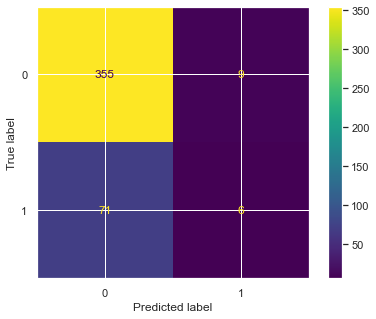

In [172]:
metrics.plot_confusion_matrix(knc,X_val,y_val)

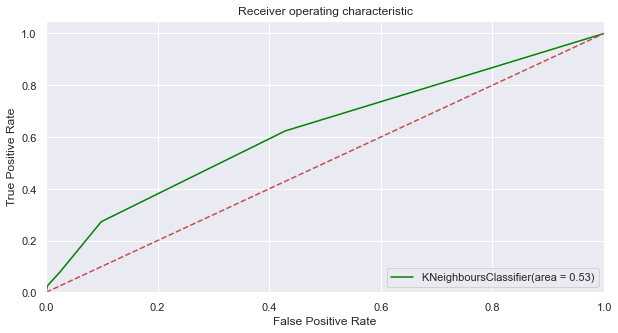

In [173]:
fig, axes = plt.subplots(figsize=(10,5))
# KNeighboursClassifier AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knc_roc_auc=roc_auc_score(y_val, knc.predict(X_val))

fpr, tpr, thresholds = roc_curve(y_val, knc.predict_proba(X_val)[:,1])


plt.plot(fpr, tpr, label='KNeighboursClassifier(area = %0.2f)' % knc_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNC_ROC')
plt.show()

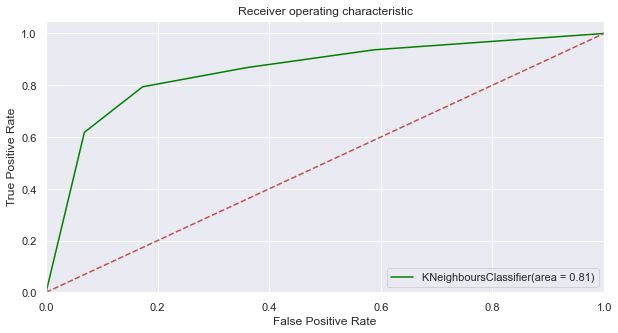

In [174]:
fig, axes = plt.subplots(figsize=(10,5))
# KNeighboursClassifier AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knc_roc_auc=roc_auc_score(oversampled_YVal, kncS.predict(oversampled_XVal))

fpr, tpr, thresholds = roc_curve(oversampled_YVal, kncS.predict_proba(oversampled_XVal)[:,1])


plt.plot(fpr, tpr, label='KNeighboursClassifier(area = %0.2f)' % knc_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNC_ROCH')
plt.show()

In [175]:
# Support Vector Classifier

In [176]:
print('Support Vector Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_svc))
print("Precision",metrics.precision_score(y_val,y_pred_svc))
print("Recall",metrics.recall_score(y_val,y_pred_svc))
print("f1_score",metrics.f1_score(y_val,y_pred_svc))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_val,y_pred_svc))

Support Vector Classifier
Accuracy: 0.8140589569160998
Precision 0.46835443037974683
Recall 0.4805194805194805
f1_score 0.4743589743589744
cohen_kappa_score 0.36143386897404195


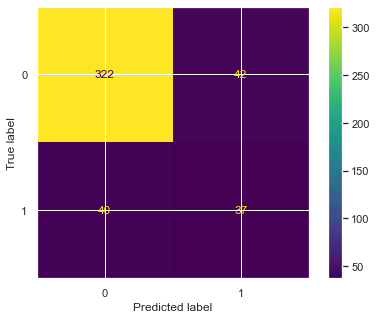

In [177]:
metrics.plot_confusion_matrix(svc,X_val,y_val)

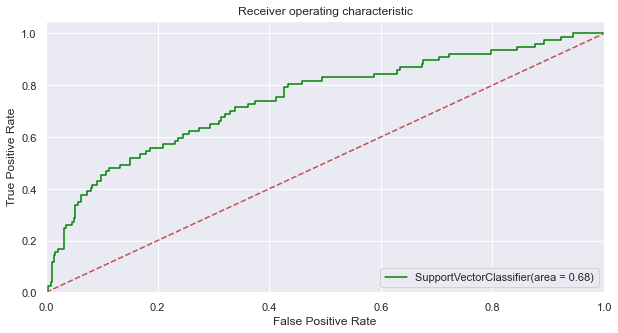

In [178]:
fig, axes = plt.subplots(figsize=(10,5))
# Support vector Classifier AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svc_roc_auc=roc_auc_score(y_val, svc.predict(X_val))

fpr, tpr, thresholds = roc_curve(y_val, svc.predict_proba(X_val)[:,1])


plt.plot(fpr, tpr, label='SupportVectorClassifier(area = %0.2f)' % svc_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('svc_ROC')
plt.show()

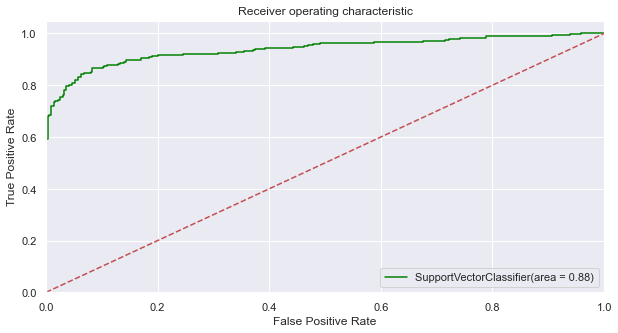

In [179]:
fig, axes = plt.subplots(figsize=(10,5))
# Support vector Classifier AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svc_roc_auc=roc_auc_score(oversampled_YVal, svcS.predict(oversampled_XVal))

fpr, tpr, thresholds = roc_curve(oversampled_YVal, svcS.predict_proba(oversampled_XVal)[:,1])


plt.plot(fpr, tpr, label='SupportVectorClassifier(area = %0.2f)' % svc_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('svc_ROCH')
plt.show()

In [180]:
# Random Forest 

In [181]:
print('Random Forest Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_rfc))
print("Precision",metrics.precision_score(y_val,y_pred_rfc))
print("Recall",metrics.recall_score(y_val,y_pred_rfc))
print("f1_score",metrics.f1_score(y_val,y_pred_rfc))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_val,y_pred_rfc))

Random Forest Classifier
Accuracy: 0.8367346938775511
Precision 0.6666666666666666
Recall 0.12987012987012986
f1_score 0.21739130434782608
cohen_kappa_score 0.17014270032930845


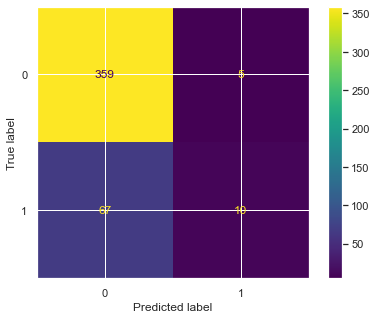

In [182]:
metrics.plot_confusion_matrix(rfc,X_val,y_val)

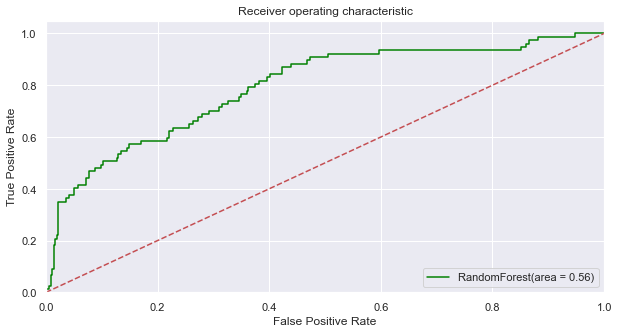

In [183]:
fig, axes = plt.subplots(figsize=(10,5))
#Random Forest AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

RF_roc_auc=roc_auc_score(y_val, rfc.predict(X_val))

fpr, tpr, thresholds = roc_curve(y_val, rfc.predict_proba(X_val)[:,1])


plt.plot(fpr, tpr, label='RandomForest(area = %0.2f)' % RF_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rfc_ROC')
plt.show()

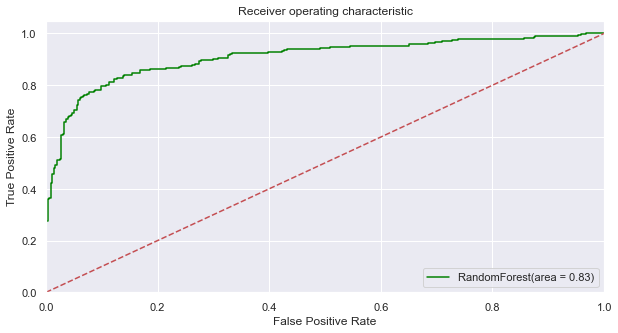

In [184]:
fig, axes = plt.subplots(figsize=(10,5))
#Random Forest AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

RF_roc_auc=roc_auc_score(oversampled_YVal, rfcS.predict(oversampled_XVal))

fpr, tpr, thresholds = roc_curve(oversampled_YVal, rfcS.predict_proba(oversampled_XVal)[:,1])


plt.plot(fpr, tpr, label='RandomForest(area = %0.2f)' % RF_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rfc_ROCH')
plt.show()

In [185]:
# GaussianNB

In [186]:
print('GaussianNB')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_gnb))
print("Precision",metrics.precision_score(y_val,y_pred_gnb))
print("Recall",metrics.recall_score(y_val,y_pred_gnb))
print("f1_score",metrics.f1_score(y_val,y_pred_gnb))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_val,y_pred_gnb))

GaussianNB
Accuracy: 0.7414965986394558
Precision 0.362962962962963
Recall 0.6363636363636364
f1_score 0.46226415094339623
cohen_kappa_score 0.3084922010398614


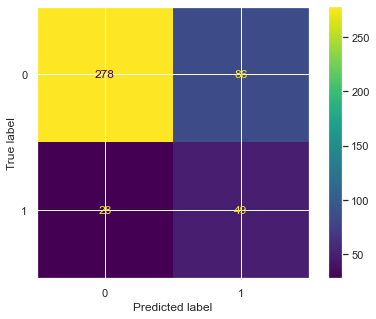

In [187]:
metrics.plot_confusion_matrix(gnb,X_val,y_val)

In [188]:
GNB__roc_auc

0.7307692307692306

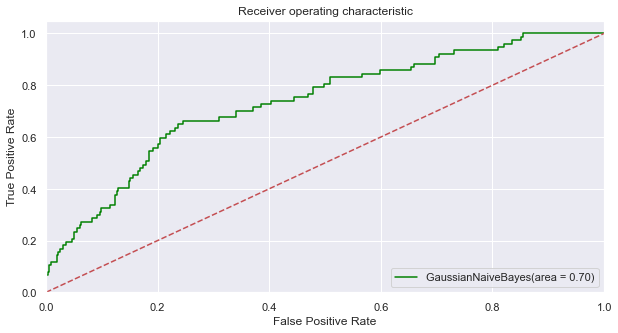

In [189]:
fig, axes = plt.subplots(figsize=(10,5))
# GaussianNaiveBayes AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

GNB_roc_auc=roc_auc_score(y_val, gnb.predict(X_val))


fpr, tpr, thresholds = roc_curve(y_val, gnb.predict_proba(X_val)[:,1])


plt.plot(fpr, tpr, label='GaussianNaiveBayes(area = %0.2f)' % GNB_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

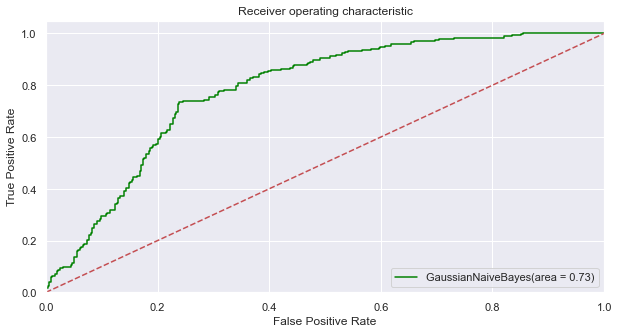

In [190]:
fig, axes = plt.subplots(figsize=(10,5))
# GaussianNaiveBayes AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

GNB_roc_auc=roc_auc_score(oversampled_YVal, gnbS.predict(oversampled_XVal))


fpr, tpr, thresholds = roc_curve(oversampled_YVal, gnbS.predict_proba(oversampled_XVal)[:,1])


plt.plot(fpr, tpr, label='GaussianNaiveBayes(area = %0.2f)' % GNB_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROCH')
plt.show()

In [191]:
# GradientBoostingClassifier

In [192]:
print('Gradient Boosting Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_gbc))
print("Precision",metrics.precision_score(y_val,y_pred_gbc))
print("Recall",metrics.recall_score(y_val,y_pred_gbc))
print("f1_score",metrics.f1_score(y_val,y_pred_gbc))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_val,y_pred_gbc))

Gradient Boosting Classifier
Accuracy: 0.8503401360544217
Precision 0.6410256410256411
Recall 0.3246753246753247
f1_score 0.43103448275862066
cohen_kappa_score 0.3553488372093023


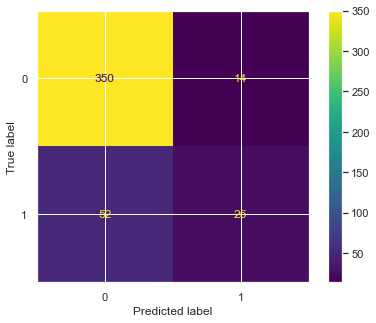

In [193]:
metrics.plot_confusion_matrix(gbc,X_val,y_val)

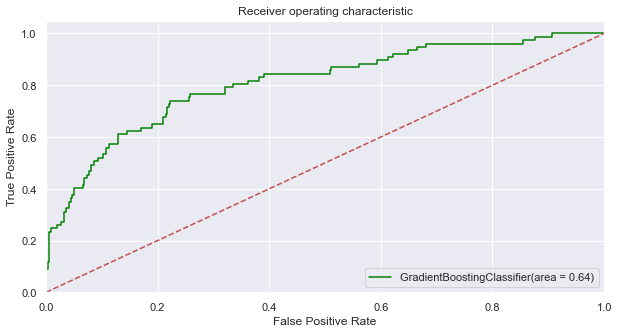

In [194]:
fig, axes = plt.subplots(figsize=(10,5))
# Gradient Boosting Classifier AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

GBC_roc_auc=roc_auc_score(y_val, gbc.predict(X_val))

fpr, tpr, thresholds = roc_curve(y_val, gbc.predict_proba(X_val)[:,1])


plt.plot(fpr, tpr, label='GradientBoostingClassifier(area = %0.2f)' % GBC_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBC_ROC')
plt.show()

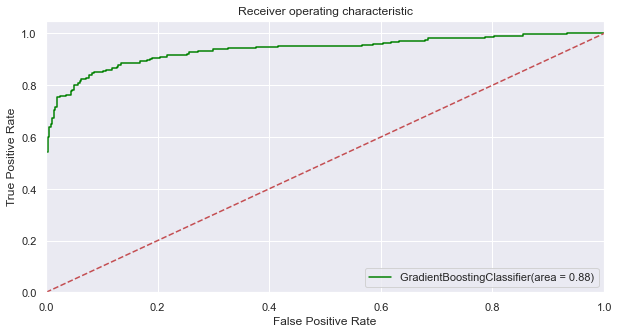

In [195]:
fig, axes = plt.subplots(figsize=(10,5))
# Gradient Boosting Classifier AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

GBC_roc_auc=roc_auc_score(oversampled_YVal, gbcS.predict(oversampled_XVal))

fpr, tpr, thresholds = roc_curve(oversampled_YVal, gbcS.predict_proba(oversampled_XVal)[:,1])


plt.plot(fpr, tpr, label='GradientBoostingClassifier(area = %0.2f)' % GBC_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBC_ROCH')
plt.show()

In [196]:
# StackingClassifier

In [197]:
print('Stacking Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_sc))
print("Precision",metrics.precision_score(y_val,y_pred_sc))
print("Recall",metrics.recall_score(y_val,y_pred_sc))
print("f1_score",metrics.f1_score(y_val,y_pred_sc))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_val,y_pred_sc))

Stacking Classifier
Accuracy: 0.8616780045351474
Precision 0.75
Recall 0.3116883116883117
f1_score 0.4403669724770642
cohen_kappa_score 0.3764400454324194


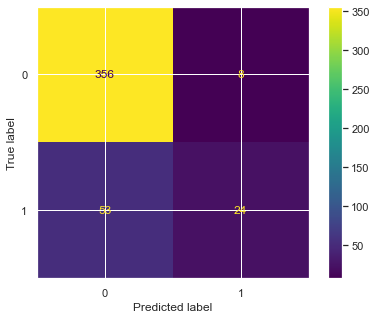

In [198]:
metrics.plot_confusion_matrix(sc,X_val,y_val)

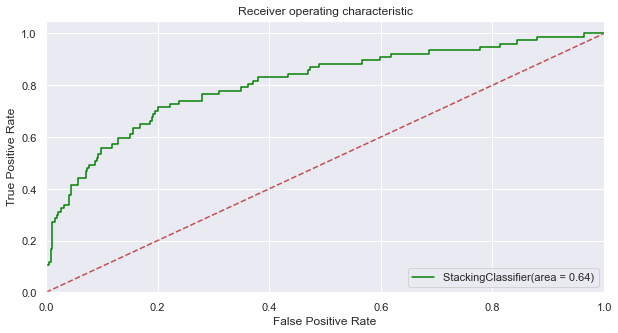

In [199]:
fig, axes = plt.subplots(figsize=(10,5))
# Stacking Classifier AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

SC_roc_auc=roc_auc_score(y_val, sc.predict(X_val))



fpr, tpr, thresholds = roc_curve(y_val, sc.predict_proba(X_val)[:,1])


plt.plot(fpr, tpr, label='StackingClassifier(area = %0.2f)' % SC_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SC_ROC')
plt.show()

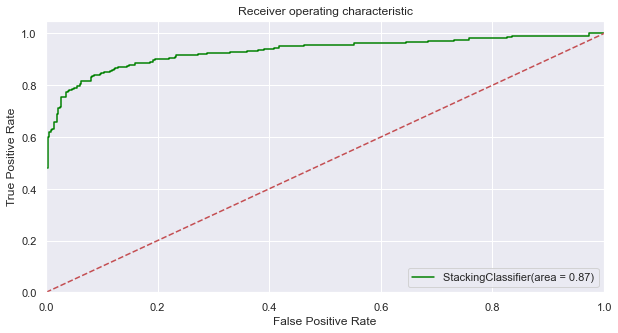

In [200]:
fig, axes = plt.subplots(figsize=(10,5))
# Stacking Classifier AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

SC_roc_auc=roc_auc_score(oversampled_YVal, scS.predict(oversampled_XVal))



fpr, tpr, thresholds = roc_curve(oversampled_YVal, scS.predict_proba(oversampled_XVal)[:,1])


plt.plot(fpr, tpr, label='StackingClassifier(area = %0.2f)' % SC_roc_auc,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SC_ROCH')
plt.show()

In [201]:
# We see how much our models ROC AUC Score improved after class imbalance issue was solved

# Model Comparison Before and after Solving Class Imbalance Issue

In [202]:
# The scores after hyperparameter optimization and before solving class imbalance issue were
# Overall F1 scores and cohen_kappa_scores are as follows
print("Logistic Regression     Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_val, y_pred_lr),metrics.precision_score(y_val, y_pred_lr),metrics.recall_score(y_val, y_pred_lr),metrics.f1_score(y_val,y_pred_lr),metrics.cohen_kappa_score(y_val,y_pred_lr)))
print("Decision Tree           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_val, y_pred_dtc),metrics.precision_score(y_val, y_pred_dtc),metrics.recall_score(y_val, y_pred_dtc),metrics.f1_score(y_val,y_pred_dtc),metrics.cohen_kappa_score(y_val,y_pred_dtc)))
print("KNN Classifier          Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_val, y_pred_knc),metrics.precision_score(y_val, y_pred_knc),metrics.recall_score(y_val, y_pred_knc),metrics.f1_score(y_val,y_pred_knc),metrics.cohen_kappa_score(y_val,y_pred_knc)))
print("SupportVectorClassifier Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_val, y_pred_svc),metrics.precision_score(y_val, y_pred_svc),metrics.recall_score(y_val, y_pred_svc),metrics.f1_score(y_val,y_pred_svc),metrics.cohen_kappa_score(y_val,y_pred_svc)))
print("Random Forest           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_val, y_pred_rfc),metrics.precision_score(y_val, y_pred_rfc),metrics.recall_score(y_val,y_pred_rfc),metrics.f1_score(y_val,y_pred_rfc),metrics.cohen_kappa_score(y_val,y_pred_rfc)))
print("GaussianNB              Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_val, y_pred_gnb),metrics.precision_score(y_val, y_pred_gnb),metrics.recall_score(y_val, y_pred_gnb),metrics.f1_score(y_val,y_pred_gnb),metrics.cohen_kappa_score(y_val,y_pred_gnb)))
print("GradientBoostingMachine Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_val, y_pred_gbc),metrics.precision_score(y_val, y_pred_gbc),metrics.recall_score(y_val, y_pred_gbc),metrics.f1_score(y_val,y_pred_gbc),metrics.cohen_kappa_score(y_val,y_pred_gbc)))
print("StackingClassifier      Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_val, y_pred_sc),metrics.precision_score(y_val, y_pred_sc),metrics.recall_score(y_val, y_pred_sc),metrics.f1_score(y_val,y_pred_sc),metrics.cohen_kappa_score(y_val,y_pred_sc)))

Logistic Regression     Accuracy is:0.77,Precision is:0.41,Recall is:0.75,F1 Score is :0.53 and Cohen_kappa_score is :0.40
Decision Tree           Accuracy is:0.82,Precision is:0.47,Recall is:0.18,F1 Score is :0.26 and Cohen_kappa_score is :0.18
KNN Classifier          Accuracy is:0.82,Precision is:0.40,Recall is:0.08,F1 Score is :0.13 and Cohen_kappa_score is :0.08
SupportVectorClassifier Accuracy is:0.81,Precision is:0.47,Recall is:0.48,F1 Score is :0.47 and Cohen_kappa_score is :0.36
Random Forest           Accuracy is:0.84,Precision is:0.67,Recall is:0.13,F1 Score is :0.22 and Cohen_kappa_score is :0.17
GaussianNB              Accuracy is:0.74,Precision is:0.36,Recall is:0.64,F1 Score is :0.46 and Cohen_kappa_score is :0.31
GradientBoostingMachine Accuracy is:0.85,Precision is:0.64,Recall is:0.32,F1 Score is :0.43 and Cohen_kappa_score is :0.36
StackingClassifier      Accuracy is:0.86,Precision is:0.75,Recall is:0.31,F1 Score is :0.44 and Cohen_kappa_score is :0.38


In [203]:
# The scores after hyperparameter optimization and solving class imbalance was
# Overall F1 scores and cohen_kappa_scores are as follows
print("Logistic Regression     Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(oversampled_YVal, y_pred_lrS),metrics.precision_score(oversampled_YVal, y_pred_lrS),metrics.recall_score(oversampled_YVal, y_pred_lrS),metrics.f1_score(oversampled_YVal,y_pred_lrS),metrics.cohen_kappa_score(oversampled_YVal,y_pred_lrS)))
print("Decision Tree           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(oversampled_YVal, y_pred_dtcS),metrics.precision_score(oversampled_YVal, y_pred_dtcS),metrics.recall_score(oversampled_YVal, y_pred_dtcS),metrics.f1_score(oversampled_YVal,y_pred_dtcS),metrics.cohen_kappa_score(oversampled_YVal,y_pred_dtcS)))
print("KNN Classifier          Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(oversampled_YVal, y_pred_kncS),metrics.precision_score(oversampled_YVal, y_pred_kncS),metrics.recall_score(oversampled_YVal, y_pred_kncS),metrics.f1_score(oversampled_YVal,y_pred_kncS),metrics.cohen_kappa_score(oversampled_YVal,y_pred_kncS)))
print("SupportVectorClassifier Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(oversampled_YVal, y_pred_svcS),metrics.precision_score(oversampled_YVal, y_pred_svcS),metrics.recall_score(oversampled_YVal, y_pred_svcS),metrics.f1_score(oversampled_YVal,y_pred_svcS),metrics.cohen_kappa_score(oversampled_YVal,y_pred_svcS)))
print("Random Forest           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(oversampled_YVal, y_pred_rfcS),metrics.precision_score(oversampled_YVal, y_pred_rfcS),metrics.recall_score(oversampled_YVal,y_pred_rfcS),metrics.f1_score(oversampled_YVal,y_pred_rfcS),metrics.cohen_kappa_score(oversampled_YVal,y_pred_rfcS)))
print("GaussianNB              Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(oversampled_YVal, y_pred_gnbS),metrics.precision_score(oversampled_YVal, y_pred_gnbS),metrics.recall_score(oversampled_YVal, y_pred_gnbS),metrics.f1_score(oversampled_YVal,y_pred_gnbS),metrics.cohen_kappa_score(oversampled_YVal,y_pred_gnbS)))
print("GradientBoostingMachine Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(oversampled_YVal, y_pred_gbcS),metrics.precision_score(oversampled_YVal, y_pred_gbcS),metrics.recall_score(oversampled_YVal, y_pred_gbcS),metrics.f1_score(oversampled_YVal,y_pred_gbcS),metrics.cohen_kappa_score(oversampled_YVal,y_pred_gbcS)))
print("StackingClassifier      Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(oversampled_YVal, y_pred_scS),metrics.precision_score(oversampled_YVal, y_pred_scS),metrics.recall_score(oversampled_YVal, y_pred_scS),metrics.f1_score(oversampled_YVal,y_pred_scS),metrics.cohen_kappa_score(oversampled_YVal,y_pred_scS)))

Logistic Regression     Accuracy is:0.91,Precision is:0.92,Recall is:0.89,F1 Score is :0.90 and Cohen_kappa_score is :0.81
Decision Tree           Accuracy is:0.74,Precision is:0.79,Recall is:0.66,F1 Score is :0.72 and Cohen_kappa_score is :0.48
KNN Classifier          Accuracy is:0.81,Precision is:0.82,Recall is:0.79,F1 Score is :0.81 and Cohen_kappa_score is :0.62
SupportVectorClassifier Accuracy is:0.88,Precision is:0.92,Recall is:0.85,F1 Score is :0.88 and Cohen_kappa_score is :0.77
Random Forest           Accuracy is:0.83,Precision is:0.93,Recall is:0.72,F1 Score is :0.81 and Cohen_kappa_score is :0.66
GaussianNB              Accuracy is:0.73,Precision is:0.75,Recall is:0.70,F1 Score is :0.72 and Cohen_kappa_score is :0.46
GradientBoostingMachine Accuracy is:0.88,Precision is:0.91,Recall is:0.84,F1 Score is :0.87 and Cohen_kappa_score is :0.76
StackingClassifier      Accuracy is:0.87,Precision is:0.91,Recall is:0.82,F1 Score is :0.87 and Cohen_kappa_score is :0.74


In [204]:
# After solving class imbalance issue our F1 scores and cohen kappa scores went up by 30 to 80 percent range for the different models.Thus we can now realise how much class imbalance issues 
# can affect our models and how much do we stand to gain by balancing the dataset

In [205]:
# We see that how a simple model like logistic regression performs so well compared to other advanced ML algorithms.We can clearly see that for preliminary model building and
# estimation purposes it can produce so good results.The other advanced algorithms  like Random Forest, Gradient Boosting Machines are close in performance and actually will 
# outperform it in most if not all cases provided the hyperparameters had been tuned like that which may sometimes be timeconsuming and we need to do a tradeoff between model performance and 
# model preperation and running time.

In [206]:
# Good Accuracy and Precision didnt  matter much here.Model evaluation Metric decided based on my objective
# Better recall should be considered as this is Attrition Dataset.To ccount for the fact that recall finds out of all the actual true values how many was i able to predict.So we need to  
# be able to detect/predict the people who are actually going to churn.Thus recall value vital in the dataset.

# Predictions from the models

In [207]:
# Lets store the predictions from logistic Regression since on overall it gave the best results in a seperate excel file so that we may take actions on that.

In [209]:
y_pred_prob = lrsS.predict_proba(data_dum)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,3,duplicates='drop').codes+1
df.groupby('P_Rank')['y_pred_P'].min()

P_Rank
1    0.000078
2    0.035807
3    0.176825
Name: y_pred_P, dtype: float64

In [214]:
df.to_csv('employee_attrition_scored_file.csv')